In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#Requirements
#python==3.7.3
#!pip install torch==1.1.0
!pip install scikit-learn==0.21.3
!pip install numpy==1.17.2
#!pip install sent2vec

In [ ]:
import warnings
import json
import os
import string
from collections import defaultdict
#from sentence_transformers import SentenceTransformer
#import sent2vec
import numpy as np
import re
from collections import Counter
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

import matplotlib.pyplot as plt
def fig_prop():
    plt.figure(figsize=(20,9))
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_new_corpus/semantic-segmentation/

/content/drive/My Drive/Legal DS/Paheli_new_corpus/semantic-segmentation


In [ ]:
for file_name in os.listdir('data/text/'):
  print(file_name.replace(".txt",""))

In [ ]:
#Ekstep format
test_string = "this is a string\tlabel"

In [ ]:

re.split(r'\t+', test_string)

['this is a string', 'label']

In [ ]:
file1 = open('data/text/2007_S_632.txt', 'r')
Lines = file1.readlines()

In [ ]:
sent_id = 0
sent_data = []
for file_name in os.listdir('data/pretrained_embeddings/'):
  doc_id = file_name.replace("txt","")
  dict_1 = {}
  dict_1['id'] = doc_id

  f = open(f'data/pretrained_embeddings/{file_name}', 'r')
  Lines = f.readlines()
  annotations = []
  result = []
  dict_2 = {}

  for line in Lines:
    split = re.split(r'\t+', line)
    sentence = split[0]
    label = split[1].replace("\n", "")
    
    dict_3 = {}
    dict_3['id'] = sent_id
    sent_id += 1

    dict_4 = {}
    dict_4['text'] = sentence
    labels = []
    labels.append(label)
    dict_4['labels'] = labels

    dict_3['value'] = dict_4

    result.append(dict_3)

  dict_2['result'] = result
  annotations.append(dict_2)
  dict_1['annotations'] = annotations

  sent_data.append(dict_1)
  f.close()

In [ ]:
sent_data[0]

In [ ]:
with open('pre_paheli_to_ekstep.json', 'w') as jsonfile:
   json.dump(sent_data, jsonfile)

In [ ]:
f = open('pre_paheli_to_ekstep.json')
train_corpus = json.load(f)
f.close()

In [ ]:
dev_corpus = train_corpus[-10:]
train_new = train_corpus[:40]

In [ ]:
with open('pre_dev_paheli_to_ekstep.json', 'w') as jsonfile:
   json.dump(dev_corpus, jsonfile)

with open('pre_train_paheli_to_ekstep.json', 'w') as jsonfile:
   json.dump(train_new, jsonfile)

In [ ]:
########Pubmed

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Pubmed

/content/drive/My Drive/Legal DS/Pubmed


In [ ]:
# f = open('train.txt', 'r')
# f = open('dev.txt', 'r')
# f = open('test.txt', 'r')
# f = open('sample_train.txt', 'r')
f = open('sample_dev.txt', 'r')

Lines = f.readlines()

In [ ]:
len(Lines)

37

In [ ]:
sent_id = 0
sent_data = []

for i in range(len(Lines)):
  if Lines[i].startswith("###"):
    doc_id = Lines[i]
    dict_1 = {}
    dict_1['id'] = doc_id
    i = i + 1

    annotations = []
    result = []
    dict_2 = {}
    
    while(not Lines[i].isspace()):
      split = re.split(r'\t+', Lines[i])
      sentence = split[1].replace("\n", "")
      label = split[0]

      dict_3 = {}
      dict_3['id'] = sent_id
      sent_id += 1

      dict_4 = {}
      dict_4['text'] = sentence
      labels = []
      labels.append(label)
      dict_4['labels'] = labels

      dict_3['value'] = dict_4

      result.append(dict_3)

      i = i + 1

      if(i >= len(Lines)):
        break

    dict_2['result'] = result
    annotations.append(dict_2)
    dict_1['annotations'] = annotations

    sent_data.append(dict_1)


In [ ]:
f.close()

In [ ]:
# with open('pubmed_train_to_ekstep.json', 'w') as jsonfile:
#    json.dump(sent_data, jsonfile)

# with open('pubmed_dev_to_ekstep.json', 'w') as jsonfile:
#    json.dump(sent_data, jsonfile)

# with open('pubmed_test_to_ekstep.json', 'w') as jsonfile:
#    json.dump(sent_data, jsonfile)

# with open('sample_train_to_ekstep.json', 'w') as jsonfile:
#    json.dump(sent_data, jsonfile)

with open('sample_dev_to_ekstep.json', 'w') as jsonfile:
   json.dump(sent_data, jsonfile)

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_bert
#train_paheli_to_ekstep

/content/drive/My Drive/Legal DS/Paheli_bert


In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Pubmed/
#pubmed_train_to_ekstep

/content/drive/My Drive/Legal DS/Pubmed


In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_new_corpus/semantic-segmentation/Corpus/

/content/drive/My Drive/Legal DS/Paheli_new_corpus/semantic-segmentation/Corpus


In [ ]:
f = open('train.json')
data = json.load(f)

doc_labels = []
sentences_len = []

for example in range(len(data)):
  sentences = data[example]['annotations'][0]['result']
  doc_label = []
  for sentence in sentences:
    sentences_len.append(len(tokenizer.tokenize(sentence['value']['text'])))
    #sentences_len.append(len(re.findall(r'\w+', sentence['value']['text'])))
    doc_label.append(sentence['value']['labels'][0])
  if(len(doc_label)!=0):
    doc_labels.append(doc_label)
  
print(len(doc_labels))

sent_labels_len = [len(x) for x in doc_labels]

avg_sent_level_labels, max_sent_labels, min_sent_labels  = sum(sent_labels_len)/len(sent_labels_len), max(sent_labels_len), min(sent_labels_len)
avg_sent_len, max_sent_len, min_sent_len = sum(sentences_len) / len(sentences_len), max(sentences_len), min(sentences_len)
print("avg_sent_level_labels", avg_sent_level_labels, "max_sent_labels", max_sent_labels, "min_sent_labels", min_sent_labels)
print("avg_sent_len", avg_sent_len, "max_sent_len", max_sent_len, "min_sent_len", min_sent_len)

245
avg_sent_level_labels 118.31020408163265 max_sent_labels 386 min_sent_labels 24
avg_sent_len 28.40526461050162 max_sent_len 380 min_sent_len 0


In [ ]:
# EKSTEP avg_sent_level_labels 118.31020408163265 max_sent_labels 386 min_sent_labels 24
# avg_sent_len 27.31394466294073 max_sent_len 370 min_sent_len 1
# avg_sent_len 28.40526461050162 max_sent_len 380 min_sent_len 0

# Paheli avg_sent_level_labels 190.6 max_sent_labels 658 min_sent_labels 79
# avg_sent_len 27.849029380902415 max_sent_len 332 min_sent_len 1
# avg_sent_len 29.291579223504723 max_sent_len 344 min_sent_len 1

# PUBMED avg_sent_level_labels 12.002666666666666 max_sent_labels 31 min_sent_labels 4
# avg_sent_len 26.338435903132638 max_sent_len 296 min_sent_len 1
# avg_sent_len 23.3491390802044 max_sent_len 289 min_sent_len 0

In [ ]:
#EKSTEP

In [ ]:
correct_spans = [(0, 9, 'PREAMBLE'), (17, 19, 'FAC'), (32, 32, 'RLC'), (40, 41, 'ISSUE'), (50, 54, 'ARG_RESPONDENT'), (104, 104, 'ANALYSIS'), (108, 109, 'RATIO'), (110, 111, 'RPC'), (112, 112, 'NONE'), (113, 141, 'PREAMBLE'), (162, 162, 'NONE'), (163, 167, 'ISSUE'), (168, 168, 'NONE'), (185, 185, 'STA'), (193, 198, 'NONE'), (199, 219, 'PREAMBLE'), (220, 225, 'NONE'), (230, 230, 'RLC'), (249, 250, 'ANALYSIS'), (251, 251, 'ISSUE'), (276, 280, 'ANALYSIS'), (327, 327, 'RPC'), (328, 328, 'NONE'), (329, 339, 'PREAMBLE'), (358, 358, 'FAC'), (359, 359, 'ISSUE'), (360, 360, 'NONE'), (385, 385, 'NONE'), (386, 389, 'PREAMBLE'), (390, 390, 'NONE'), (436, 436, 'STA'), (455, 459, 'RPC'), (460, 461, 'NONE'), (462, 469, 'PREAMBLE'), (470, 470, 'NONE'), (522, 522, 'RLC'), (523, 524, 'FAC'), (525, 525, 'ANALYSIS'), (665, 668, 'RPC'), (669, 670, 'NONE'), (671, 686, 'PREAMBLE'), (763, 764, 'ANALYSIS'), (780, 781, 'RPC'), (782, 802, 'PREAMBLE'), (850, 858, 'NONE'), (888, 892, 'NONE'), (893, 893, 'FAC'), (897, 897, 'ISSUE'), (898, 898, 'ANALYSIS'), (905, 905, 'ANALYSIS'), (921, 925, 'ANALYSIS'), (926, 926, 'STA'), (927, 933, 'ANALYSIS'), (934, 934, 'ISSUE'), (942, 942, 'PRE_RELIED'), (968, 968, 'RATIO'), (971, 978, 'PREAMBLE'), (979, 991, 'FAC'), (992, 994, 'ISSUE'), (998, 998, 'ARG_RESPONDENT'), (1016, 1019, 'RPC'), (1020, 1024, 'NONE'), (1060, 1060, 'FAC'), (1061, 1062, 'RLC'), (1145, 1145, 'PRE_RELIED'), (1146, 1148, 'ANALYSIS'), (1163, 1163, 'NONE'), (1204, 1204, 'FAC'), (1205, 1205, 'ISSUE'), (1239, 1239, 'STA'), (1243, 1246, 'ANALYSIS'), (1277, 1277, 'PRE_RELIED'), (1314, 1321, 'PREAMBLE'), (1322, 1322, 'NONE'), (1346, 1349, 'ANALYSIS'), (1355, 1355, 'RPC'), (1356, 1356, 'NONE'), (1357, 1376, 'PREAMBLE'), (1377, 1381, 'NONE'), (1392, 1393, 'RLC'), (1394, 1394, 'FAC'), (1395, 1399, 'ANALYSIS'), (1407, 1409, 'RPC'), (1410, 1410, 'NONE'), (1411, 1452, 'PREAMBLE'), (1453, 1477, 'FAC'), (1487, 1487, 'NONE'), (1610, 1621, 'PREAMBLE'), (1625, 1629, 'FAC'), (1630, 1630, 'ISSUE'), (1631, 1644, 'FAC'), (1645, 1671, 'ANALYSIS'), (1672, 1672, 'RATIO'), (1673, 1674, 'RPC'), (1675, 1675, 'NONE'), (1724, 1724, 'ISSUE'), (1789, 1790, 'ARG_RESPONDENT'), (1859, 1859, 'NONE'), (1860, 1861, 'RPC'), (1862, 1874, 'PREAMBLE'), (1884, 1888, 'ISSUE'), (1889, 1899, 'FAC'), (1902, 1906, 'ANALYSIS'), (1907, 1907, 'RATIO'), (1908, 1910, 'RPC'), (1911, 1920, 'NONE'), (1940, 1945, 'FAC'), (1949, 1949, 'ARG_PETITIONER'), (1950, 1950, 'STA'), (1955, 1955, 'ISSUE'), (1956, 1956, 'ANALYSIS'), (1957, 1958, 'STA'), (1959, 1959, 'ANALYSIS'), (1960, 1961, 'STA'), (1966, 1972, 'ANALYSIS'), (1973, 1973, 'PRE_RELIED'), (1974, 1974, 'ANALYSIS'), (1988, 1988, 'NONE'), (2050, 2050, 'NONE'), (2051, 2053, 'PREAMBLE'), (2054, 2054, 'NONE'), (2075, 2075, 'NONE'), (2111, 2111, 'PRE_RELIED'), (2118, 2118, 'PRE_RELIED'), (2122, 2122, 'PRE_RELIED'), (2123, 2136, 'ANALYSIS'), (2169, 2169, 'NONE'), (2188, 2189, 'NONE'), (2190, 2194, 'PREAMBLE'), (2195, 2195, 'NONE'), (2203, 2203, 'PRE_RELIED'), (2213, 2213, 'ISSUE'), (2216, 2219, 'RPC'), (2220, 2220, 'NONE'), (2232, 2238, 'NONE'), (2271, 2271, 'FAC'), (2317, 2319, 'PREAMBLE'), (2320, 2330, 'FAC'), (2352, 2357, 'ANALYSIS'), (2358, 2358, 'RATIO'), (2359, 2359, 'RPC'), (2360, 2362, 'NONE'), (2394, 2395, 'ISSUE'), (2425, 2426, 'NONE'), (2449, 2449, 'RLC'), (2450, 2450, 'FAC'), (2465, 2466, 'PRE_RELIED'), (2477, 2477, 'RATIO'), (2478, 2478, 'RPC'), (2479, 2479, 'NONE'), (2563, 2563, 'NONE'), (2577, 2577, 'NONE'), (2578, 2599, 'PREAMBLE'), (2600, 2604, 'NONE'), (2605, 2605, 'FAC'), (2606, 2606, 'ISSUE'), (2607, 2616, 'FAC'), (2617, 2617, 'ARG_PETITIONER'), (2618, 2622, 'ANALYSIS'), (2623, 2623, 'STA'), (2624, 2624, 'ANALYSIS'), (2638, 2638, 'RPC'), (2639, 2639, 'NONE'), (2640, 2652, 'PREAMBLE'), (2653, 2659, 'NONE'), (2774, 2774, 'RPC'), (2775, 2785, 'PREAMBLE'), (2847, 2871, 'ANALYSIS'), (2872, 2872, 'PRE_RELIED')]

In [ ]:
# labels = ['MASK', 'PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO', 'START', 'STOP']
labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

In [ ]:
labels_count = []
for label in labels:
  labels_count.append(0)

In [ ]:
for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

In [ ]:
labels_count

[20, 41, 18, 15, 3, 2, 24, 10, 0, 8, 6, 16, 6]

In [ ]:
# per_label_F1 = [0.0, 0.9812807881773399, 0.9018567639257294, 0.8356275303643725, 0.7777777777777777, 0.48101265822784817, 0.26666666666666666, 0.8199195171026158, 0.4881889763779527, 0.0, 0.4719101123595506, 0.45555555555555555, 0.8771929824561403, 0.4806201550387597, 0.0, 0.0]
per_label_F1 = [0.9812807881773399, 0.9018567639257294, 0.8356275303643725, 0.7777777777777777, 0.48101265822784817, 0.26666666666666666, 0.8199195171026158, 0.4881889763779527, 0.0, 0.4719101123595506, 0.45555555555555555, 0.8771929824561403, 0.4806201550387597]

In [ ]:
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib
matplotlib.rcParams.update({'font.size': 10})

import matplotlib.pyplot as plt
def fig_prop():
    plt.figure(figsize=(16,9))
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

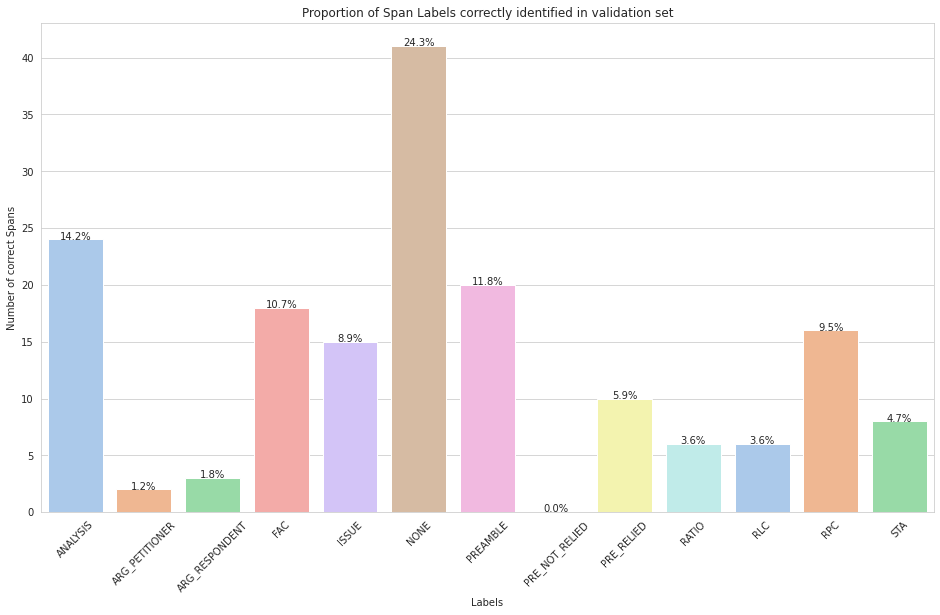

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Proportion of Span Labels correctly identified in validation set')
plt.show()

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(data.Correct_Spans_Count, labels = data.Labels, colors = colors, autopct='%.0f%%')
plt.show()

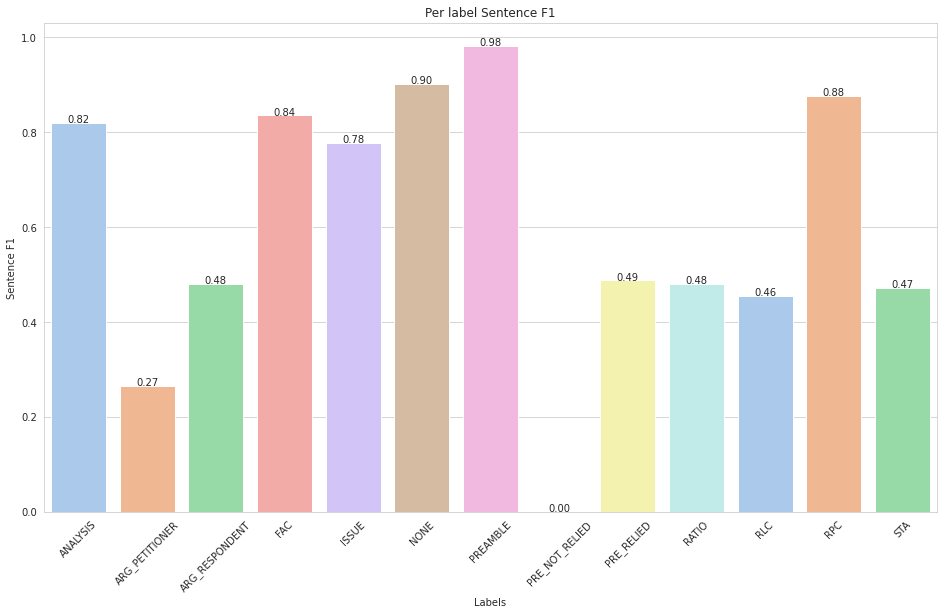

In [ ]:
fig_prop()
ax = sns.barplot(x = labels, y = per_label_F1, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1')
plt.show()

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_new_corpus/semantic-segmentation/Corpus/

/content/drive/My Drive/Legal DS/Paheli_new_corpus/semantic-segmentation/Corpus


In [ ]:
f = open('train.json')
train_data = json.load(f)
f.close()

f = open('dev.json')
dev_data = json.load(f)
f.close()

In [ ]:
all_train_labels = []
for example in range(len(train_data)):
  sentences = train_data[example]['annotations'][0]['result']
  for sentence in sentences:
    all_train_labels.append(sentence['value']['labels'][0])

In [ ]:
train_dict = Counter(all_train_labels)

In [ ]:
train_df = pd.DataFrame.from_dict(train_dict, orient='index', columns = ['Count']).rename_axis('Labels').reset_index()

In [ ]:
train_df = train_df.sort_values('Labels')

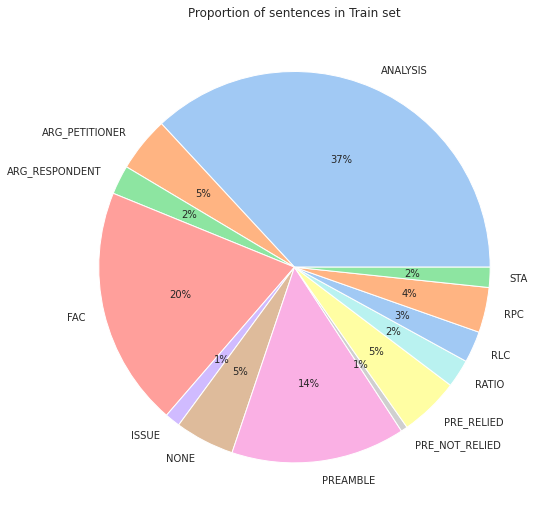

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(train_df.Count, labels = train_df.Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of sentences in Train set')
plt.show()

In [ ]:
all_dev_labels = []
for example in range(len(dev_data)):
  sentences = dev_data[example]['annotations'][0]['result']
  for sentence in sentences:
    all_dev_labels.append(sentence['value']['labels'][0])

dev_dict = Counter(all_dev_labels)

dev_df = pd.DataFrame.from_dict(dev_dict, orient='index', columns = ['Count']).rename_axis('Labels').reset_index()

dev_df = dev_df.sort_values('Labels')

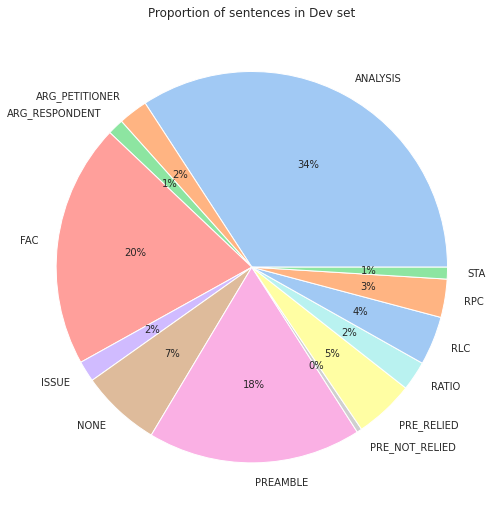

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(dev_df.Count, labels = dev_df.Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of sentences in Dev set')
plt.show()

In [ ]:
dev_df.Count.sum()

2879

In [ ]:
#SPAN LEN 6

In [ ]:
correct_spans= [(0, 20, 'PREAMBLE'), (21, 26, 'NONE'), (29, 30, 'FAC'), (31, 31, 'RLC'), (52, 52, 'ISSUE'), (53, 61, 'ANALYSIS'), (127, 127, 'RATIO'), (128, 128, 'RPC'), (129, 129, 'NONE'), (130, 170, 'PREAMBLE'), (171, 176, 'NONE'), (178, 178, 'ISSUE'), (313, 313, 'NONE'), (316, 325, 'PREAMBLE'), (356, 357, 'ISSUE'), (420, 420, 'ANALYSIS'), (426, 427, 'RPC'), (428, 428, 'NONE'), (464, 465, 'RLC'), (482, 482, 'NONE'), (483, 485, 'PREAMBLE'), (486, 496, 'FAC'), (497, 500, 'ISSUE'), (518, 523, 'ANALYSIS'), (524, 524, 'RATIO'), (529, 557, 'PREAMBLE'), (584, 584, 'NONE'), (601, 601, 'STA'), (749, 749, 'RPC'), (788, 788, 'ISSUE'), (797, 797, 'STA'), (798, 799, 'ANALYSIS'), (817, 817, 'STA'), (818, 824, 'ANALYSIS'), (825, 825, 'ISSUE'), (860, 860, 'RPC'), (861, 861, 'NONE'), (862, 874, 'PREAMBLE'), (884, 888, 'ISSUE'), (889, 899, 'FAC'), (902, 906, 'ANALYSIS'), (907, 907, 'RATIO'), (908, 910, 'RPC'), (921, 941, 'PREAMBLE'), (985, 988, 'RPC'), (998, 1009, 'PREAMBLE'), (1010, 1012, 'NONE'), (1013, 1017, 'FAC'), (1018, 1018, 'ISSUE'), (1060, 1060, 'RATIO'), (1061, 1062, 'RPC'), (1063, 1063, 'NONE'), (1064, 1066, 'PREAMBLE'), (1067, 1067, 'NONE'), (1110, 1111, 'NONE'), (1124, 1124, 'PRE_RELIED'), (1125, 1130, 'ANALYSIS'), (1131, 1131, 'PRE_RELIED'), (1182, 1182, 'NONE'), (1203, 1241, 'PREAMBLE'), (1242, 1245, 'NONE'), (1256, 1257, 'RLC'), (1286, 1286, 'NONE'), (1300, 1300, 'NONE'), (1341, 1341, 'FAC'), (1342, 1342, 'ISSUE'), (1376, 1376, 'STA'), (1380, 1383, 'ANALYSIS'), (1414, 1414, 'PRE_RELIED'), (1415, 1446, 'ANALYSIS'), (1482, 1483, 'ISSUE'), (1513, 1514, 'NONE'), (1515, 1519, 'PREAMBLE'), (1520, 1520, 'NONE'), (1538, 1538, 'ISSUE'), (1545, 1545, 'NONE'), (1546, 1561, 'PREAMBLE'), (1562, 1567, 'NONE'), (1655, 1656, 'RPC'), (1657, 1678, 'PREAMBLE'), (1679, 1683, 'NONE'), (1684, 1684, 'FAC'), (1685, 1685, 'ISSUE'), (1686, 1695, 'FAC'), (1696, 1696, 'ARG_PETITIONER'), (1702, 1702, 'STA'), (1703, 1703, 'ANALYSIS'), (1718, 1718, 'NONE'), (1757, 1763, 'FAC'), (1780, 1780, 'NONE'), (1901, 1901, 'PRE_RELIED'), (1919, 1919, 'NONE'), (1931, 1937, 'NONE'), (1970, 1970, 'FAC'), (2016, 2023, 'PREAMBLE'), (2024, 2036, 'FAC'), (2037, 2039, 'ISSUE'), (2061, 2064, 'RPC'), (2070, 2080, 'PREAMBLE'), (2100, 2100, 'ISSUE'), (2101, 2101, 'NONE'), (2126, 2126, 'NONE'), (2127, 2168, 'PREAMBLE'), (2201, 2202, 'FAC'), (2203, 2203, 'NONE'), (2225, 2227, 'ARG_PETITIONER'), (2326, 2333, 'PREAMBLE'), (2334, 2334, 'NONE'), (2389, 2389, 'ANALYSIS'), (2390, 2392, 'PRE_RELIED'), (2533, 2534, 'NONE'), (2535, 2538, 'PREAMBLE'), (2539, 2539, 'NONE'), (2592, 2592, 'STA'), (2604, 2608, 'RPC'), (2648, 2648, 'ISSUE'), (2662, 2662, 'RPC'), (2663, 2663, 'NONE'), (2693, 2693, 'STA'), (2700, 2701, 'STA'), (2702, 2702, 'ANALYSIS'), (2703, 2704, 'STA'), (2709, 2715, 'ANALYSIS'), (2716, 2716, 'PRE_RELIED'), (2717, 2717, 'ANALYSIS'), (2731, 2731, 'NONE'), (2732, 2739, 'PREAMBLE'), (2740, 2740, 'NONE'), (2774, 2774, 'NONE'), (2847, 2871, 'ANALYSIS'), (2877, 2878, 'RPC')]
labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[19, 35, 11, 15, 0, 2, 15, 6, 0, 9, 3, 12, 4]

In [ ]:
per_label_F1 = [0.9769230769230769, 0.6978193146417445, 0.8181120491174214, 0.6461538461538462, 0.2891566265060241, 0.304, 0.8090328915071182, 0.495575221238938, 0.13793103448275862, 0.5970149253731343, 0.2014388489208633, 0.7482993197278911, 0.33663366336633666]

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

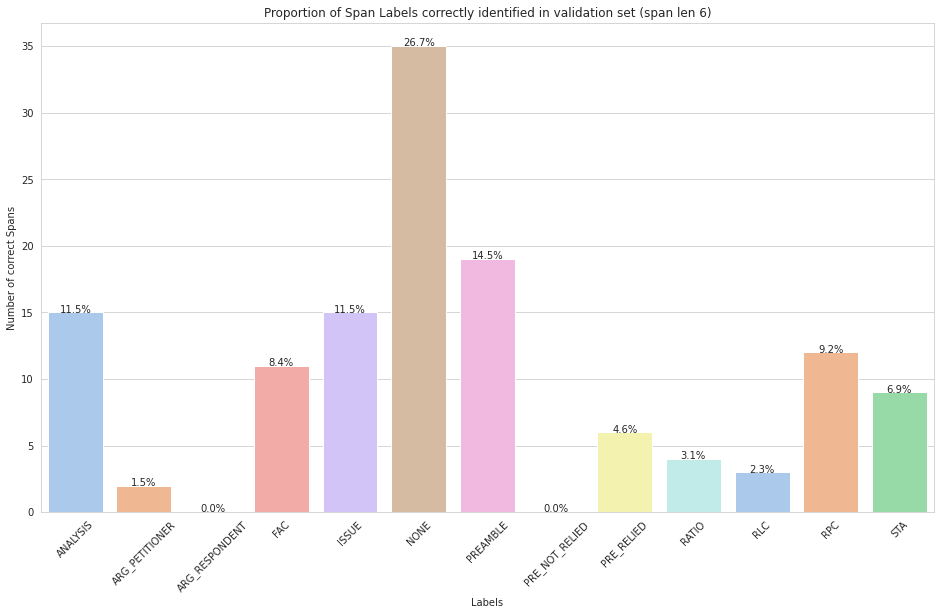

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Proportion of Span Labels correctly identified in validation set (span len 6)')
plt.show()

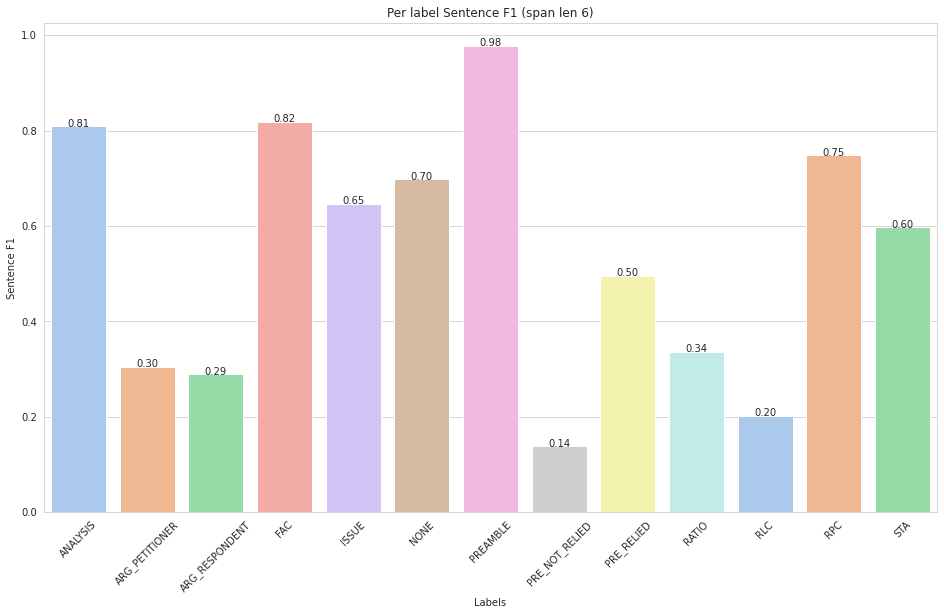

In [ ]:
fig_prop()
ax = sns.barplot(x = labels, y = per_label_F1, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1 (span len 6)')
plt.show()

In [ ]:
#SPAN LEN 10

In [ ]:
correct_spans= [(41, 41, 'ISSUE'), (200, 201, 'ANALYSIS'), (202, 202, 'ISSUE'), (278, 278, 'RPC'), (279, 279, 'NONE'), (280, 282, 'PREAMBLE'), (415, 416, 'RPC'), (417, 418, 'NONE'), (470, 470, 'RPC'), (471, 471, 'NONE'), (483, 489, 'NONE'), (540, 541, 'STA'), (771, 774, 'RPC'), (775, 776, 'NONE'), (818, 823, 'NONE'), (824, 824, 'RLC'), (825, 825, 'ISSUE'), (963, 984, 'PREAMBLE'), (985, 989, 'NONE'), (1024, 1024, 'NONE'), (1102, 1121, 'PREAMBLE'), (1122, 1126, 'NONE'), (1137, 1138, 'RLC'), (1139, 1139, 'FAC'), (1155, 1155, 'NONE'), (1156, 1163, 'PREAMBLE'), (1164, 1176, 'FAC'), (1177, 1179, 'ISSUE'), (1270, 1271, 'RPC'), (1272, 1273, 'NONE'), (1274, 1289, 'PREAMBLE'), (1297, 1301, 'RLC'), (1302, 1331, 'FAC'), (1332, 1360, 'ANALYSIS'), (1383, 1384, 'RPC'), (1446, 1446, 'NONE'), (1559, 1559, 'NONE'), (1560, 1571, 'PREAMBLE'), (1623, 1624, 'RPC'), (1625, 1625, 'NONE'), (1626, 1667, 'PREAMBLE'), (1894, 1898, 'RPC'), (1899, 1900, 'NONE'), (2005, 2034, 'PREAMBLE'), (2035, 2039, 'NONE'), (2141, 2142, 'RPC'), (2143, 2143, 'NONE'), (2144, 2148, 'PREAMBLE'), (2167, 2167, 'ISSUE'), (2174, 2174, 'NONE'), (2175, 2187, 'PREAMBLE'), (2188, 2191, 'NONE'), (2203, 2203, 'ARG_PETITIONER'), (2227, 2227, 'PRE_RELIED'), (2228, 2228, 'ANALYSIS'), (2229, 2229, 'PRE_RELIED'), (2242, 2242, 'NONE'), (2243, 2281, 'PREAMBLE'), (2282, 2285, 'NONE'), (2340, 2340, 'NONE'), (2341, 2369, 'PREAMBLE'), (2466, 2466, 'ANALYSIS'), (2537, 2537, 'RPC'), (2538, 2538, 'NONE'), (2539, 2551, 'PREAMBLE'), (2584, 2584, 'RATIO'), (2598, 2608, 'PREAMBLE'), (2629, 2629, 'NONE'), (2654, 2654, 'NONE'), (2655, 2657, 'PREAMBLE'), (2658, 2668, 'FAC'), (2669, 2672, 'ISSUE'), (2721, 2723, 'RLC'), (2833, 2834, 'RATIO'), (2835, 2835, 'RPC'), (2836, 2843, 'PREAMBLE'), (2878, 2878, 'NONE')]

labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[16, 26, 4, 6, 0, 1, 4, 2, 0, 1, 4, 11, 2]

In [ ]:
per_label_F1= [0.9476688867745005, 0.6779661016949152, 0.8020477815699659, 0.546875, 0.0, 0.04494382022471909, 0.7371456030754445, 0.1891891891891892, 0.0, 0.45070422535211263, 0.1954887218045113, 0.6454545454545455, 0.45614035087719296]

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

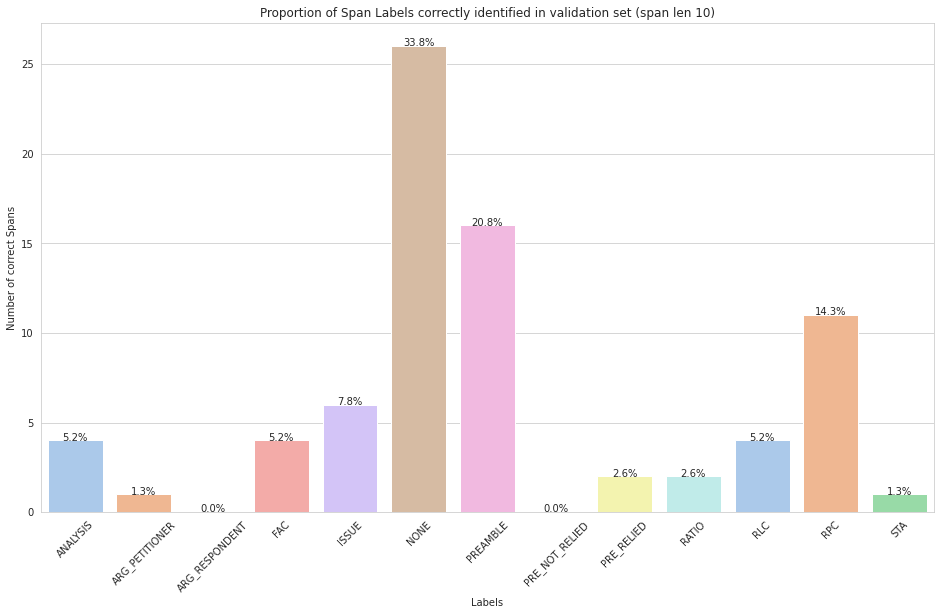

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Proportion of Span Labels correctly identified in validation set (span len 10)')
plt.show()

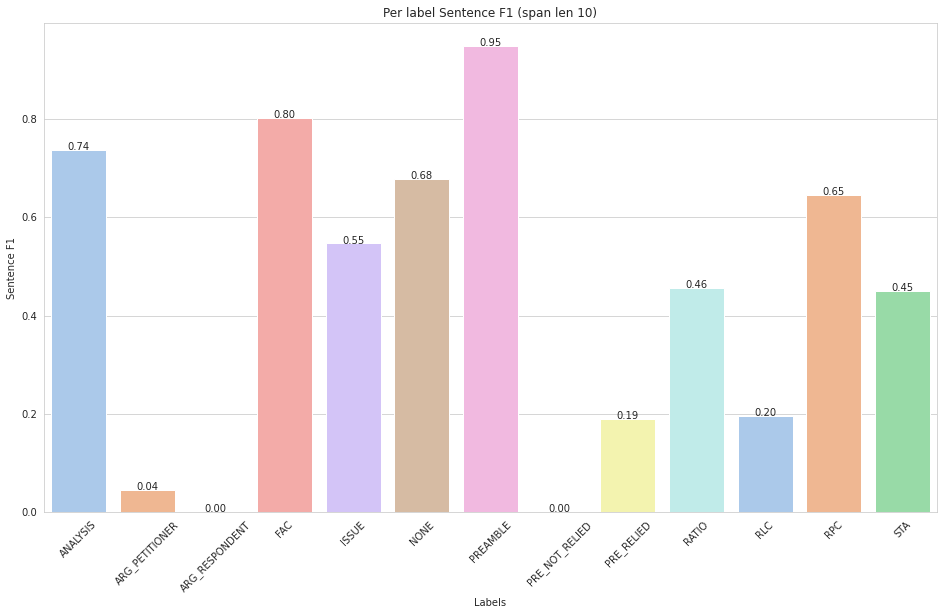

In [ ]:
fig_prop()
ax = sns.barplot(x = labels, y = per_label_F1, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1 (span len 10)')
plt.show()

In [ ]:
#####BASELINE

In [ ]:
correct_spans = [(9, 59, 'FAC'), (60, 60, 'RLC'), (61, 62, 'FAC'), (63, 63, 'ANALYSIS'), (203, 206, 'RPC'), (207, 208, 'NONE'), (209, 250, 'PREAMBLE'), (251, 275, 'FAC'), (382, 407, 'NONE'), (408, 448, 'PREAMBLE'), (449, 454, 'NONE'), (455, 455, 'RLC'), (514, 518, 'ANALYSIS'), (523, 523, 'ANALYSIS'), (591, 591, 'NONE'), (592, 593, 'RPC'), (594, 628, 'PREAMBLE'), (629, 633, 'NONE'), (635, 635, 'ISSUE'), (669, 669, 'STA'), (673, 676, 'ANALYSIS'), (804, 804, 'PRE_RELIED'), (805, 810, 'ANALYSIS'), (811, 811, 'PRE_RELIED'), (812, 814, 'ANALYSIS'), (815, 815, 'PRE_RELIED'), (816, 829, 'ANALYSIS'), (879, 880, 'RPC'), (881, 882, 'NONE'), (883, 912, 'PREAMBLE'), (913, 917, 'NONE'), (1007, 1007, 'STA'), (1021, 1021, 'NONE'), (1022, 1034, 'PREAMBLE'), (1035, 1041, 'NONE'), (1154, 1155, 'RATIO'), (1156, 1156, 'RPC'), (1157, 1177, 'PREAMBLE'), (1178, 1183, 'NONE'), (1188, 1188, 'RLC'), (1219, 1220, 'PRE_RELIED'), (1221, 1229, 'ANALYSIS'), (1287, 1296, 'PREAMBLE'), (1327, 1328, 'ISSUE'), (1399, 1399, 'NONE'), (1434, 1434, 'FAC'), (1446, 1446, 'ANALYSIS'), (1447, 1447, 'STA'), (1448, 1449, 'ANALYSIS'), (1467, 1467, 'STA'), (1509, 1509, 'RATIO'), (1512, 1527, 'PREAMBLE'), (1535, 1539, 'RLC'), (1604, 1605, 'ANALYSIS'), (1621, 1622, 'RPC'), (1623, 1633, 'PREAMBLE'), (1695, 1719, 'ANALYSIS'), (1720, 1720, 'PRE_RELIED'), (1780, 1781, 'RLC'), (1782, 1799, 'ANALYSIS'), (1824, 1824, 'NONE'), (1825, 1834, 'PREAMBLE'), (1875, 1875, 'FAC'), (1921, 1949, 'PREAMBLE'), (1970, 1970, 'NONE'), (1971, 1975, 'ISSUE'), (2001, 2006, 'NONE'), (2007, 2027, 'PREAMBLE'), (2039, 2068, 'ANALYSIS'), (2069, 2070, 'RATIO'), (2071, 2074, 'RPC'), (2075, 2083, 'NONE'), (2084, 2087, 'PREAMBLE'), (2088, 2088, 'NONE'), (2153, 2157, 'RPC'), (2158, 2159, 'NONE'), (2195, 2195, 'ANALYSIS'), (2196, 2197, 'STA'), (2198, 2198, 'ANALYSIS'), (2199, 2200, 'STA'), (2212, 2212, 'PRE_RELIED'), (2213, 2213, 'ANALYSIS'), (2214, 2214, 'PRE_RELIED'), (2227, 2227, 'NONE'), (2228, 2239, 'PREAMBLE'), (2248, 2248, 'ISSUE'), (2291, 2292, 'RPC'), (2293, 2293, 'NONE'), (2356, 2357, 'NONE'), (2358, 2372, 'PREAMBLE'), (2419, 2419, 'NONE'), (2447, 2447, 'FAC'), (2448, 2448, 'ISSUE'), (2449, 2458, 'FAC'), (2459, 2459, 'ARG_PETITIONER'), (2460, 2464, 'ANALYSIS'), (2465, 2465, 'STA'), (2466, 2466, 'ANALYSIS'), (2481, 2481, 'NONE'), (2482, 2494, 'PREAMBLE'), (2504, 2508, 'ISSUE'), (2528, 2530, 'RPC'), (2531, 2540, 'NONE'), (2541, 2551, 'PREAMBLE'), (2568, 2569, 'RLC'), (2570, 2570, 'FAC'), (2571, 2571, 'ISSUE'), (2572, 2572, 'NONE'), (2573, 2592, 'ANALYSIS'), (2597, 2597, 'NONE'), (2636, 2640, 'ANALYSIS'), (2646, 2647, 'RATIO'), (2648, 2650, 'RPC'), (2651, 2651, 'NONE'), (2660, 2672, 'FAC'), (2673, 2675, 'ISSUE'), (2697, 2700, 'RPC'), (2701, 2705, 'NONE'), (2758, 2758, 'NONE'), (2762, 2772, 'FAC'), (2773, 2776, 'ISSUE'), (2802, 2804, 'NONE'), (2805, 2812, 'PREAMBLE'), (2813, 2813, 'NONE'), (2846, 2846, 'RPC'), (2847, 2847, 'NONE'), (2853, 2853, 'NONE'), (2874, 2877, 'RPC'), (2878, 2878, 'NONE')]

labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[18, 33, 10, 9, 0, 1, 21, 7, 0, 7, 6, 13, 4]

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count)),
               columns =['Labels', 'Correct_Spans_Count'])

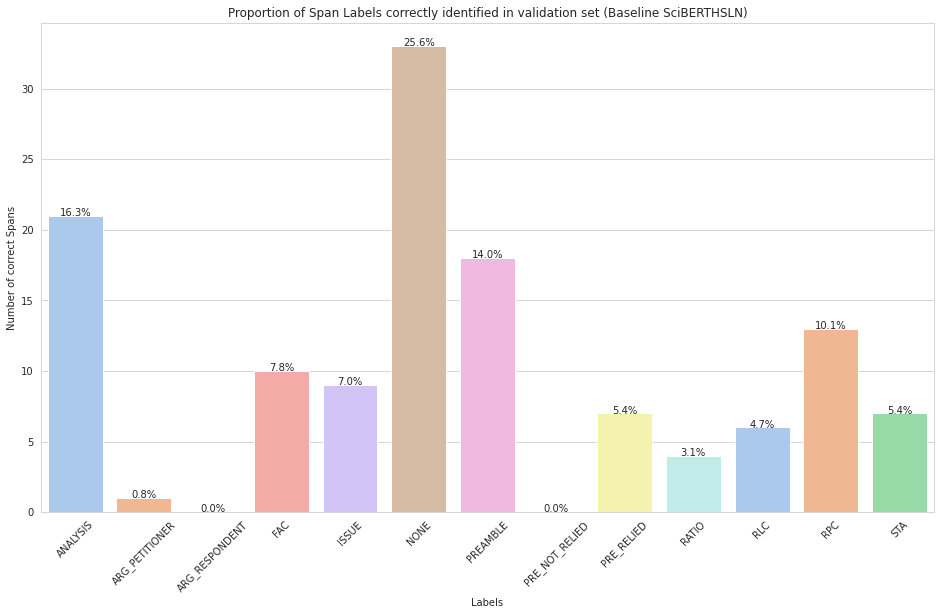

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Proportion of Span Labels correctly identified in validation set (Baseline SciBERTHSLN)')
plt.show()

In [ ]:
#INCORRECT IN SPAN LEN 2

In [ ]:
incorrect_spans= [(9, 59, 'FAC'), (64, 66, 'PRE_RELIED'), (67, 194, 'ANALYSIS'), (195, 202, 'RATIO'), (223, 226, 'ISSUE'), (227, 238, 'ARG_PETITIONER'), (239, 243, 'ARG_RESPONDENT'), (275, 277, 'RLC'), (278, 295, 'FAC'), (296, 296, 'ARG_PETITIONER'), (297, 300, 'ANALYSIS'), (301, 301, 'PRE_RELIED'), (302, 386, 'ANALYSIS'), (387, 388, 'RATIO'), (390, 404, 'PREAMBLE'), (405, 409, 'NONE'), (410, 426, 'FAC'), (427, 427, 'STA'), (428, 434, 'FAC'), (435, 443, 'ANALYSIS'), (444, 446, 'PRE_RELIED'), (447, 450, 'RPC'), (452, 492, 'PREAMBLE'), (493, 498, 'NONE'), (499, 499, 'RLC'), (501, 525, 'FAC'), (526, 551, 'ANALYSIS'), (552, 557, 'RLC'), (558, 562, 'ANALYSIS'), (563, 564, 'ARG_PETITIONER'), (567, 567, 'ANALYSIS'), (568, 569, 'STA'), (570, 571, 'ANALYSIS'), (572, 572, 'STA'), (573, 573, 'ANALYSIS'), (574, 574, 'STA'), (575, 585, 'ANALYSIS'), (586, 609, 'PRE_RELIED'), (610, 610, 'NONE'), (611, 629, 'ANALYSIS'), (630, 634, 'RATIO'), (644, 645, 'FAC'), (646, 650, 'ANALYSIS'), (652, 656, 'ANALYSIS'), (657, 658, 'ARG_RESPONDENT'), (659, 660, 'ARG_PETITIONER'), (662, 662, 'PRE_RELIED'), (663, 663, 'ANALYSIS'), (696, 697, 'ISSUE'), (698, 699, 'FAC'), (701, 701, 'FAC'), (702, 702, 'NONE'), (703, 704, 'FAC'), (705, 705, 'NONE'), (706, 718, 'FAC'), (722, 730, 'ANALYSIS'), (731, 732, 'PRE_RELIED'), (733, 741, 'ANALYSIS'), (742, 745, 'ARG_PETITIONER'), (751, 766, 'ARG_PETITIONER'), (767, 777, 'ANALYSIS'), (778, 779, 'ARG_PETITIONER'), (780, 795, 'ANALYSIS'), (796, 796, 'RATIO'), (811, 813, 'NONE'), (865, 874, 'PREAMBLE'), (875, 875, 'ANALYSIS'), (883, 911, 'FAC'), (912, 914, 'RLC'), (916, 917, 'ARG_PETITIONER'), (918, 932, 'ANALYSIS'), (933, 934, 'STA'), (935, 937, 'PRE_RELIED'), (938, 955, 'ANALYSIS'), (956, 960, 'RPC'), (972, 979, 'NONE'), (980, 982, 'FAC'), (983, 987, 'RLC'), (988, 1024, 'FAC'), (1025, 1028, 'RLC'), (1029, 1032, 'FAC'), (1059, 1062, 'RATIO'), (1063, 1064, 'RPC'), (1065, 1093, 'PREAMBLE'), (1100, 1100, 'RLC'), (1101, 1102, 'FAC'), (1105, 1108, 'ARG_PETITIONER'), (1109, 1110, 'ARG_RESPONDENT'), (1112, 1112, 'STA'), (1113, 1114, 'ANALYSIS'), (1115, 1126, 'PRE_RELIED'), (1141, 1147, 'ANALYSIS'), (1149, 1156, 'ANALYSIS'), (1157, 1157, 'FAC'), (1158, 1173, 'ANALYSIS'), (1175, 1175, 'RPC'), (1176, 1176, 'NONE'), (1181, 1181, 'RLC'), (1182, 1185, 'FAC'), (1186, 1188, 'RLC'), (1189, 1189, 'FAC'), (1190, 1200, 'RLC'), (1202, 1214, 'RLC'), (1215, 1215, 'ISSUE'), (1216, 1218, 'ANALYSIS'), (1219, 1222, 'PRE_RELIED'), (1223, 1224, 'NONE'), (1225, 1228, 'PRE_RELIED'), (1229, 1236, 'ANALYSIS'), (1238, 1243, 'ANALYSIS'), (1245, 1247, 'ANALYSIS'), (1263, 1294, 'PRE_RELIED'), (1296, 1307, 'PRE_RELIED'), (1308, 1308, 'ANALYSIS'), (1309, 1311, 'RATIO'), (1312, 1313, 'RPC'), (1321, 1325, 'RLC'), (1326, 1343, 'FAC'), (1344, 1344, 'ANALYSIS'), (1345, 1345, 'FAC'), (1346, 1349, 'ANALYSIS'), (1350, 1365, 'FAC'), (1367, 1372, 'ANALYSIS'), (1373, 1373, 'STA'), (1374, 1374, 'ANALYSIS'), (1375, 1384, 'RATIO'), (1392, 1430, 'PREAMBLE'), (1431, 1434, 'NONE'), (1435, 1437, 'ISSUE'), (1438, 1444, 'FAC'), (1445, 1446, 'RLC'), (1447, 1464, 'ANALYSIS'), (1465, 1468, 'PRE_RELIED'), (1469, 1473, 'ANALYSIS'), (1474, 1474, 'RATIO'), (1476, 1480, 'ANALYSIS'), (1481, 1484, 'RATIO'), (1485, 1488, 'RPC'), (1499, 1500, 'FAC'), (1501, 1507, 'RLC'), (1508, 1508, 'FAC'), (1509, 1514, 'ANALYSIS'), (1515, 1516, 'ARG_PETITIONER'), (1517, 1519, 'ANALYSIS'), (1520, 1521, 'ARG_PETITIONER'), (1526, 1527, 'ARG_RESPONDENT'), (1528, 1529, 'ANALYSIS'), (1530, 1530, 'RATIO'), (1543, 1543, 'RLC'), (1544, 1547, 'FAC'), (1548, 1549, 'RLC'), (1553, 1557, 'RLC'), (1558, 1564, 'FAC'), (1566, 1568, 'FAC'), (1569, 1572, 'ANALYSIS'), (1575, 1577, 'ANALYSIS'), (1578, 1582, 'ARG_PETITIONER'), (1588, 1633, 'ANALYSIS'), (1634, 1636, 'ARG_PETITIONER'), (1638, 1640, 'PRE_NOT_RELIED'), (1675, 1693, 'FAC'), (1694, 1694, 'ANALYSIS'), (1702, 1716, 'ANALYSIS'), (1717, 1717, 'RATIO'), (1719, 1721, 'RATIO'), (1722, 1722, 'NONE'), (1723, 1725, 'RPC'), (1753, 1757, 'FAC'), (1758, 1758, 'ARG_PETITIONER'), (1759, 1759, 'FAC'), (1760, 1763, 'ISSUE'), (1764, 1793, 'ANALYSIS'), (1794, 1795, 'RATIO'), (1796, 1799, 'RPC'), (1809, 1817, 'PREAMBLE'), (1818, 1823, 'NONE'), (1824, 1824, 'FAC'), (1825, 1825, 'RLC'), (1826, 1830, 'FAC'), (1833, 1835, 'ARG_PETITIONER'), (1836, 1837, 'ARG_RESPONDENT'), (1838, 1841, 'ANALYSIS'), (1842, 1843, 'ARG_RESPONDENT'), (1844, 1845, 'ANALYSIS'), (1846, 1846, 'ISSUE'), (1849, 1856, 'ANALYSIS'), (1857, 1858, 'RPC'), (1887, 1892, 'FAC'), (1893, 1894, 'RLC'), (1895, 1896, 'FAC'), (1905, 1909, 'PRE_RELIED'), (1910, 1911, 'RATIO'), (1983, 1989, 'ISSUE'), (1990, 1991, 'FAC'), (1993, 1997, 'ANALYSIS'), (1998, 1998, 'NONE'), (1999, 2013, 'ANALYSIS'), (2014, 2016, 'ARG_PETITIONER'), (2017, 2024, 'ARG_RESPONDENT'), (2025, 2074, 'ANALYSIS'), (2075, 2080, 'RATIO'), (2081, 2088, 'RPC'), (2089, 2114, 'NONE'), (2162, 2163, 'PRE_NOT_RELIED'), (2164, 2171, 'ANALYSIS'), (2172, 2174, 'RATIO'), (2177, 2206, 'PREAMBLE'), (2207, 2211, 'NONE'), (2215, 2267, 'FAC'), (2268, 2270, 'RLC'), (2271, 2274, 'FAC'), (2275, 2296, 'ANALYSIS'), (2301, 2301, 'STA'), (2302, 2310, 'ANALYSIS'), (2311, 2312, 'RATIO'), (2313, 2314, 'RPC'), (2316, 2350, 'PREAMBLE'), (2351, 2355, 'NONE'), (2358, 2372, 'FAC'), (2373, 2387, 'RLC'), (2388, 2388, 'ISSUE'), (2389, 2390, 'ANALYSIS'), (2392, 2392, 'ANALYSIS'), (2393, 2394, 'STA'), (2399, 2410, 'PRE_RELIED'), (2411, 2412, 'ANALYSIS'), (2413, 2414, 'PRE_RELIED'), (2415, 2420, 'ANALYSIS'), (2421, 2425, 'PRE_RELIED'), (2426, 2428, 'STA'), (2430, 2461, 'ANALYSIS'), (2462, 2465, 'RPC'), (2466, 2472, 'PREAMBLE'), (2473, 2474, 'NONE'), (2475, 2496, 'FAC'), (2499, 2501, 'STA'), (2502, 2523, 'ANALYSIS'), (2524, 2525, 'RATIO'), (2526, 2527, 'RPC'), (2541, 2541, 'RLC'), (2542, 2552, 'FAC'), (2553, 2554, 'RLC'), (2555, 2556, 'FAC'), (2557, 2558, 'RLC'), (2562, 2581, 'ANALYSIS'), (2582, 2585, 'RPC'), (2603, 2608, 'NONE'), (2609, 2609, 'FAC'), (2610, 2614, 'RLC'), (2615, 2644, 'FAC'), (2645, 2673, 'ANALYSIS'), (2674, 2675, 'PRE_NOT_RELIED'), (2676, 2676, 'PRE_RELIED'), (2677, 2678, 'PRE_NOT_RELIED'), (2681, 2683, 'PRE_NOT_RELIED'), (2684, 2694, 'ANALYSIS'), (2695, 2695, 'RATIO'), (2711, 2717, 'FAC'), (2718, 2719, 'ARG_RESPONDENT'), (2736, 2737, 'ARG_RESPONDENT'), (2781, 2783, 'FAC'), (2785, 2788, 'FAC'), (2789, 2789, 'ANALYSIS'), (2790, 2792, 'ARG_RESPONDENT'), (2793, 2799, 'ANALYSIS'), (2800, 2801, 'RATIO'), (2811, 2823, 'PREAMBLE'), (2824, 2827, 'NONE'), (2828, 2829, 'RLC'), (2836, 2837, 'RLC'), (2838, 2838, 'FAC'), (2841, 2844, 'ANALYSIS'), (2852, 2855, 'ARG_PETITIONER'), (2865, 2865, 'PRE_RELIED'), (2866, 2870, 'ANALYSIS'), (2871, 2877, 'RPC')]

In [ ]:
labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in incorrect_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[10, 19, 47, 8, 10, 17, 68, 19, 5, 11, 27, 15, 20]

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count)),
               columns =['Labels', 'Illegal_Spans_Count'])

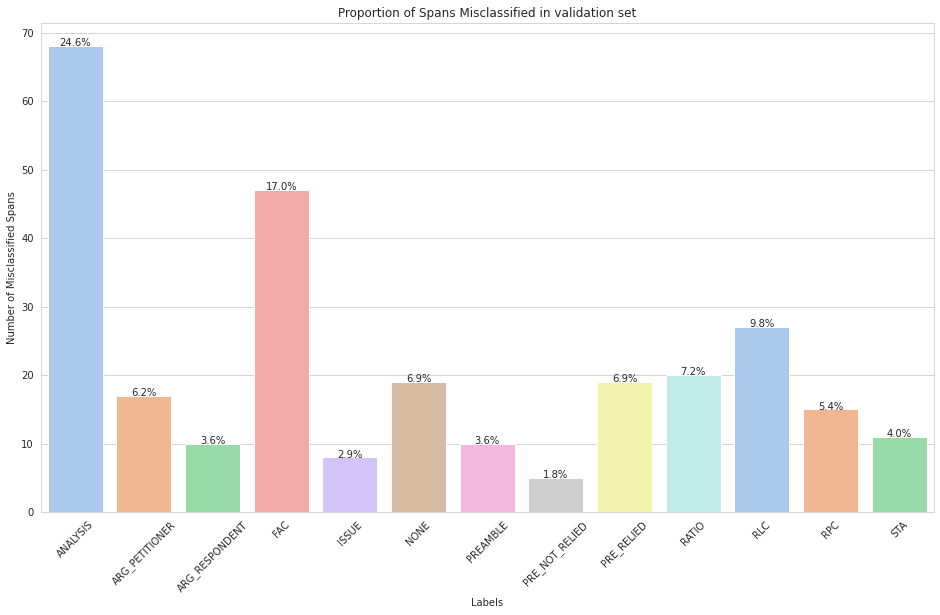

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Illegal_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of Misclassified Spans')
plt.title('Proportion of Spans Misclassified in validation set')
plt.show()

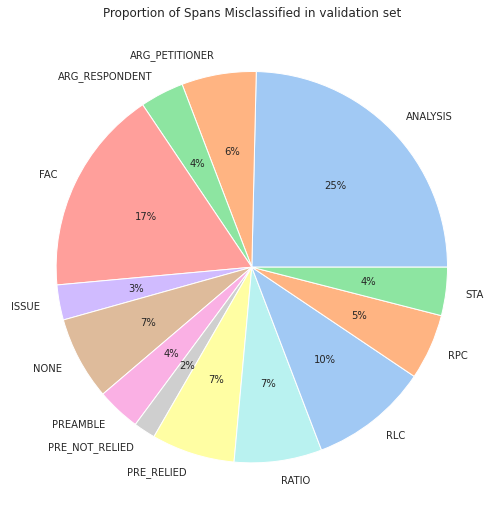

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(data.sort_values('Labels').Illegal_Spans_Count, labels = data.sort_values('Labels').Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of Spans Misclassified in validation set')
plt.show()

In [ ]:
##################

In [ ]:
illegal_spans = [(4, 11, 'FAC'), (12, 12, 'RLC'), (13, 13, 'FAC'), (14, 14, 'RLC'), (15, 15, 'PRE_RELIED'), (16, 18, 'RLC'), (19, 23, 'ANALYSIS'), (25, 33, 'ANALYSIS'), (34, 34, 'PRE_RELIED'), (35, 35, 'ANALYSIS'), (36, 36, 'PRE_RELIED'), (37, 41, 'ANALYSIS'), (42, 42, 'PRE_RELIED'), (43, 43, 'ANALYSIS'), (44, 44, 'PRE_RELIED'), (45, 46, 'ANALYSIS'), (47, 47, 'NONE'), (48, 49, 'ANALYSIS'), (50, 52, 'PRE_RELIED'), (53, 54, 'ANALYSIS'), (55, 56, 'PRE_RELIED'), (57, 57, 'ANALYSIS'), (58, 58, 'PRE_RELIED'), (59, 59, 'ANALYSIS'), (61, 62, 'ANALYSIS'), (63, 63, 'PRE_RELIED'), (64, 66, 'ANALYSIS'), (68, 68, 'STA'), (69, 70, 'ANALYSIS'), (86, 88, 'PRE_RELIED'), (89, 96, 'ANALYSIS'), (97, 98, 'PRE_RELIED'), (99, 101, 'ANALYSIS'), (102, 103, 'PRE_RELIED'), (104, 104, 'ANALYSIS'), (105, 107, 'PRE_RELIED'), (108, 108, 'ANALYSIS'), (109, 109, 'PRE_RELIED'), (110, 110, 'ANALYSIS'), (111, 111, 'PRE_RELIED'), (112, 112, 'ANALYSIS'), (113, 113, 'PRE_RELIED'), (114, 117, 'ANALYSIS'), (119, 132, 'ANALYSIS'), (133, 135, 'RATIO'), (136, 136, 'RPC'), (166, 166, 'ISSUE'), (167, 169, 'FAC'), (171, 183, 'FAC'), (184, 184, 'ANALYSIS'), (185, 188, 'STA'), (192, 198, 'ANALYSIS'), (199, 199, 'ARG_PETITIONER'), (200, 200, 'ANALYSIS'), (201, 204, 'PRE_RELIED'), (205, 205, 'ARG_PETITIONER'), (206, 207, 'ANALYSIS'), (208, 208, 'PRE_RELIED'), (209, 211, 'ANALYSIS'), (212, 212, 'ARG_RESPONDENT'), (213, 213, 'ARG_PETITIONER'), (214, 215, 'ARG_RESPONDENT'), (221, 222, 'ARG_RESPONDENT'), (223, 223, 'ANALYSIS'), (224, 227, 'ARG_RESPONDENT'), (228, 231, 'PRE_RELIED'), (232, 232, 'STA'), (233, 235, 'PRE_RELIED'), (236, 236, 'ANALYSIS'), (237, 237, 'PRE_RELIED'), (238, 238, 'ANALYSIS'), (239, 239, 'PRE_RELIED'), (240, 241, 'ANALYSIS'), (242, 242, 'PRE_RELIED'), (243, 246, 'ANALYSIS'), (247, 249, 'ARG_PETITIONER'), (250, 260, 'ANALYSIS'), (261, 261, 'RATIO'), (262, 262, 'ARG_PETITIONER'), (263, 263, 'ANALYSIS'), (264, 266, 'RATIO'), (280, 296, 'FAC'), (297, 297, 'RLC'), (301, 321, 'ANALYSIS'), (322, 323, 'RATIO'), (324, 324, 'RPC'), (393, 393, 'NONE'), (394, 400, 'ISSUE'), (401, 401, 'ANALYSIS'), (403, 416, 'ANALYSIS'), (417, 417, 'NONE'), (418, 423, 'ANALYSIS'), (424, 424, 'ARG_RESPONDENT'), (425, 425, 'ARG_PETITIONER'), (426, 426, 'ANALYSIS'), (427, 433, 'ARG_RESPONDENT'), (434, 434, 'ANALYSIS'), (435, 435, 'NONE'), (436, 479, 'ANALYSIS'), (480, 480, 'RATIO'), (481, 483, 'ANALYSIS'), (484, 484, 'RATIO'), (485, 491, 'ANALYSIS'), (492, 499, 'RPC'), (500, 524, 'NONE'), (536, 545, 'NONE'), (546, 546, 'FAC'), (547, 547, 'RLC'), (548, 550, 'FAC'), (551, 551, 'RLC'), (552, 552, 'FAC'), (553, 553, 'ISSUE'), (554, 554, 'RLC'), (555, 588, 'FAC'), (589, 590, 'ANALYSIS'), (591, 592, 'RLC'), (593, 594, 'FAC'), (595, 595, 'ANALYSIS'), (596, 596, 'RLC'), (623, 623, 'ANALYSIS'), (624, 624, 'PRE_RELIED'), (625, 625, 'ANALYSIS'), (626, 627, 'RATIO'), (628, 628, 'RPC'), (650, 657, 'FAC'), (658, 660, 'ISSUE'), (661, 691, 'ANALYSIS'), (692, 693, 'RATIO'), (694, 696, 'RPC'), (726, 726, 'FAC'), (727, 728, 'RLC'), (729, 749, 'FAC'), (750, 757, 'ANALYSIS'), (758, 758, 'RLC'), (759, 838, 'ANALYSIS'), (839, 839, 'RATIO'), (841, 848, 'PREAMBLE'), (849, 849, 'NONE'), (850, 868, 'FAC'), (869, 871, 'ARG_RESPONDENT'), (874, 874, 'STA'), (875, 875, 'ANALYSIS'), (876, 877, 'STA'), (878, 886, 'ANALYSIS'), (887, 887, 'STA'), (888, 899, 'ANALYSIS'), (900, 901, 'RATIO'), (902, 902, 'RPC'), (930, 939, 'FAC'), (948, 948, 'PRE_RELIED'), (949, 950, 'ANALYSIS'), (951, 951, 'RATIO'), (952, 952, 'PRE_RELIED'), (953, 953, 'ANALYSIS'), (954, 954, 'RATIO'), (1006, 1006, 'ARG_PETITIONER'), (1007, 1009, 'ANALYSIS'), (1010, 1010, 'ARG_RESPONDENT'), (1011, 1011, 'ARG_PETITIONER'), (1012, 1013, 'ANALYSIS'), (1014, 1014, 'ARG_RESPONDENT'), (1015, 1018, 'ANALYSIS'), (1021, 1051, 'PREAMBLE'), (1052, 1055, 'NONE'), (1059, 1106, 'FAC'), (1107, 1107, 'RLC'), (1108, 1111, 'FAC'), (1112, 1112, 'RLC'), (1113, 1117, 'FAC'), (1118, 1118, 'RLC'), (1119, 1119, 'FAC'), (1120, 1135, 'ANALYSIS'), (1136, 1136, 'ARG_PETITIONER'), (1137, 1140, 'ANALYSIS'), (1145, 1146, 'STA'), (1147, 1147, 'ANALYSIS'), (1148, 1148, 'ARG_PETITIONER'), (1149, 1150, 'ANALYSIS'), (1151, 1151, 'STA'), (1152, 1152, 'ANALYSIS'), (1153, 1153, 'STA'), (1154, 1154, 'ANALYSIS'), (1155, 1157, 'RATIO'), (1158, 1158, 'RPC'), (1169, 1169, 'FAC'), (1170, 1170, 'NONE'), (1171, 1219, 'FAC'), (1224, 1227, 'PRE_RELIED'), (1228, 1228, 'ANALYSIS'), (1229, 1229, 'PRE_RELIED'), (1230, 1230, 'ANALYSIS'), (1231, 1231, 'PRE_RELIED'), (1232, 1232, 'ANALYSIS'), (1233, 1233, 'PRE_RELIED'), (1234, 1234, 'STA'), (1235, 1359, 'ANALYSIS'), (1360, 1360, 'RATIO'), (1361, 1361, 'ANALYSIS'), (1362, 1362, 'RATIO'), (1383, 1387, 'ISSUE'), (1388, 1393, 'ANALYSIS'), (1394, 1398, 'FAC'), (1399, 1399, 'ARG_PETITIONER'), (1400, 1400, 'ARG_RESPONDENT'), (1401, 1401, 'ARG_PETITIONER'), (1402, 1403, 'ARG_RESPONDENT'), (1427, 1427, 'NONE'), (1428, 1428, 'FAC'), (1429, 1429, 'NONE'), (1497, 1503, 'NONE'), (1504, 1504, 'FAC'), (1505, 1508, 'RLC'), (1509, 1542, 'FAC'), (1543, 1544, 'ANALYSIS'), (1545, 1545, 'STA'), (1546, 1550, 'ANALYSIS'), (1551, 1552, 'ARG_PETITIONER'), (1553, 1565, 'ANALYSIS'), (1566, 1566, 'ARG_PETITIONER'), (1567, 1567, 'ANALYSIS'), (1568, 1568, 'ARG_PETITIONER'), (1569, 1569, 'STA'), (1570, 1571, 'PRE_RELIED'), (1572, 1572, 'STA'), (1575, 1577, 'PRE_RELIED'), (1578, 1578, 'ANALYSIS'), (1579, 1579, 'PRE_RELIED'), (1580, 1580, 'ARG_PETITIONER'), (1581, 1581, 'PRE_RELIED'), (1582, 1582, 'STA'), (1583, 1584, 'ANALYSIS'), (1585, 1585, 'ARG_RESPONDENT'), (1586, 1586, 'ANALYSIS'), (1587, 1589, 'RATIO'), (1592, 1596, 'PREAMBLE'), (1597, 1597, 'RLC'), (1598, 1599, 'FAC'), (1600, 1620, 'PREAMBLE'), (1627, 1628, 'RLC'), (1629, 1629, 'FAC'), (1632, 1632, 'ISSUE'), (1633, 1633, 'ARG_PETITIONER'), (1634, 1634, 'ANALYSIS'), (1635, 1635, 'NONE'), (1636, 1636, 'ARG_PETITIONER'), (1637, 1637, 'STA'), (1639, 1640, 'STA'), (1641, 1641, 'ANALYSIS'), (1642, 1643, 'PRE_RELIED'), (1644, 1644, 'ANALYSIS'), (1645, 1645, 'PRE_RELIED'), (1646, 1646, 'STA'), (1647, 1648, 'ANALYSIS'), (1649, 1649, 'PRE_RELIED'), (1650, 1650, 'ANALYSIS'), (1651, 1651, 'PRE_RELIED'), (1652, 1652, 'ANALYSIS'), (1653, 1653, 'PRE_RELIED'), (1668, 1669, 'ANALYSIS'), (1670, 1670, 'STA'), (1671, 1674, 'ANALYSIS'), (1676, 1700, 'ANALYSIS'), (1702, 1703, 'RPC'), (1704, 1713, 'PREAMBLE'), (1714, 1714, 'FAC'), (1715, 1715, 'NONE'), (1716, 1716, 'FAC'), (1717, 1718, 'NONE'), (1719, 1722, 'FAC'), (1723, 1723, 'RLC'), (1724, 1725, 'FAC'), (1728, 1732, 'ARG_PETITIONER'), (1733, 1733, 'STA'), (1734, 1741, 'ANALYSIS'), (1744, 1750, 'ANALYSIS'), (1751, 1751, 'RATIO'), (1752, 1752, 'ANALYSIS'), (1753, 1753, 'RPC'), (1757, 1792, 'PREAMBLE'), (1793, 1796, 'NONE'), (1799, 1817, 'FAC'), (1818, 1818, 'RLC'), (1819, 1819, 'FAC'), (1820, 1820, 'RLC'), (1821, 1824, 'ANALYSIS'), (1825, 1825, 'STA'), (1826, 1826, 'ANALYSIS'), (1827, 1827, 'STA'), (1828, 1829, 'ANALYSIS'), (1830, 1830, 'STA'), (1831, 1831, 'ANALYSIS'), (1833, 1834, 'ANALYSIS'), (1835, 1835, 'STA'), (1840, 1840, 'PRE_RELIED'), (1841, 1841, 'ANALYSIS'), (1842, 1845, 'PRE_RELIED'), (1846, 1846, 'ANALYSIS'), (1847, 1847, 'PRE_RELIED'), (1848, 1849, 'ANALYSIS'), (1850, 1850, 'STA'), (1851, 1853, 'ANALYSIS'), (1854, 1854, 'PRE_RELIED'), (1855, 1855, 'ANALYSIS'), (1856, 1856, 'PRE_RELIED'), (1857, 1861, 'ANALYSIS'), (1862, 1863, 'PRE_RELIED'), (1864, 1864, 'ANALYSIS'), (1865, 1865, 'ARG_RESPONDENT'), (1866, 1866, 'ANALYSIS'), (1867, 1867, 'STA'), (1868, 1869, 'ANALYSIS'), (1871, 1875, 'ANALYSIS'), (1876, 1876, 'PRE_RELIED'), (1877, 1901, 'ANALYSIS'), (1902, 1903, 'RATIO'), (1904, 1906, 'RPC'), (1916, 1916, 'RLC'), (1917, 1918, 'FAC'), (1919, 1919, 'RLC'), (1920, 1925, 'FAC'), (1926, 1926, 'NONE'), (1927, 1933, 'FAC'), (1934, 1934, 'ARG_PETITIONER'), (1935, 1935, 'ANALYSIS'), (1936, 1936, 'ISSUE'), (1937, 1937, 'ARG_PETITIONER'), (1938, 1938, 'FAC'), (1943, 1943, 'NONE'), (1944, 1944, 'ARG_PETITIONER'), (1945, 1945, 'ANALYSIS'), (1946, 1947, 'RATIO'), (1950, 1957, 'PREAMBLE'), (1958, 1962, 'FAC'), (1963, 1966, 'PREAMBLE'), (1967, 1968, 'STA'), (1969, 1991, 'PREAMBLE'), (1992, 1996, 'NONE'), (1997, 1997, 'FAC'), (1999, 2049, 'FAC'), (2050, 2050, 'RLC'), (2051, 2052, 'FAC'), (2053, 2053, 'RLC'), (2054, 2055, 'FAC'), (2056, 2056, 'RLC'), (2057, 2061, 'FAC'), (2062, 2062, 'ANALYSIS'), (2065, 2065, 'ISSUE'), (2066, 2068, 'STA'), (2069, 2069, 'ANALYSIS'), (2070, 2072, 'STA'), (2073, 2074, 'ANALYSIS'), (2075, 2075, 'STA'), (2076, 2076, 'ANALYSIS'), (2077, 2077, 'STA'), (2078, 2078, 'ANALYSIS'), (2079, 2079, 'STA'), (2080, 2080, 'ANALYSIS'), (2081, 2081, 'PRE_RELIED'), (2082, 2082, 'STA'), (2083, 2084, 'ANALYSIS'), (2085, 2085, 'ARG_PETITIONER'), (2086, 2086, 'STA'), (2087, 2090, 'ANALYSIS'), (2091, 2091, 'FAC'), (2092, 2092, 'PRE_RELIED'), (2093, 2096, 'ANALYSIS'), (2097, 2097, 'PRE_RELIED'), (2098, 2098, 'ARG_PETITIONER'), (2099, 2099, 'STA'), (2100, 2101, 'ANALYSIS'), (2102, 2102, 'STA'), (2103, 2104, 'ANALYSIS'), (2105, 2105, 'PRE_RELIED'), (2106, 2106, 'ANALYSIS'), (2107, 2108, 'PRE_RELIED'), (2109, 2109, 'ANALYSIS'), (2110, 2110, 'PRE_RELIED'), (2111, 2119, 'ANALYSIS'), (2120, 2120, 'PRE_RELIED'), (2121, 2122, 'ANALYSIS'), (2123, 2123, 'ARG_RESPONDENT'), (2124, 2126, 'ANALYSIS'), (2127, 2127, 'RATIO'), (2128, 2129, 'ANALYSIS'), (2130, 2130, 'RATIO'), (2131, 2131, 'ANALYSIS'), (2132, 2132, 'RATIO'), (2136, 2146, 'PREAMBLE'), (2154, 2154, 'FAC'), (2155, 2155, 'NONE'), (2156, 2171, 'FAC'), (2172, 2172, 'ANALYSIS'), (2173, 2173, 'RLC'), (2174, 2182, 'ANALYSIS'), (2183, 2183, 'RLC'), (2184, 2184, 'FAC'), (2185, 2185, 'RLC'), (2187, 2188, 'ANALYSIS'), (2189, 2189, 'ISSUE'), (2190, 2194, 'ANALYSIS'), (2195, 2195, 'RLC'), (2196, 2196, 'PRE_RELIED'), (2197, 2198, 'ANALYSIS'), (2199, 2199, 'ARG_RESPONDENT'), (2200, 2204, 'ANALYSIS'), (2205, 2205, 'STA'), (2206, 2206, 'ANALYSIS'), (2207, 2210, 'PRE_RELIED'), (2211, 2226, 'ANALYSIS'), (2227, 2227, 'RATIO'), (2228, 2231, 'RPC'), (2242, 2242, 'FAC'), (2243, 2243, 'NONE'), (2244, 2247, 'FAC'), (2248, 2248, 'RLC'), (2252, 2252, 'RLC'), (2253, 2256, 'FAC'), (2257, 2261, 'ISSUE'), (2262, 2262, 'NONE'), (2263, 2263, 'FAC'), (2265, 2266, 'FAC'), (2267, 2267, 'ANALYSIS'), (2268, 2268, 'ARG_RESPONDENT'), (2269, 2269, 'ANALYSIS'), (2270, 2271, 'NONE'), (2274, 2277, 'ANALYSIS'), (2278, 2278, 'ARG_PETITIONER'), (2279, 2279, 'RLC'), (2280, 2280, 'ARG_PETITIONER'), (2281, 2281, 'ANALYSIS'), (2287, 2290, 'ANALYSIS'), (2291, 2291, 'ISSUE'), (2292, 2316, 'ANALYSIS'), (2317, 2317, 'PRE_RELIED'), (2318, 2333, 'ANALYSIS'), (2334, 2334, 'PRE_NOT_RELIED'), (2335, 2335, 'PRE_RELIED'), (2337, 2337, 'PRE_RELIED'), (2338, 2338, 'ANALYSIS'), (2339, 2339, 'PRE_RELIED'), (2350, 2350, 'RLC'), (2351, 2351, 'FAC'), (2352, 2354, 'RLC'), (2355, 2377, 'FAC'), (2378, 2378, 'RLC'), (2379, 2388, 'FAC'), (2389, 2394, 'ARG_PETITIONER'), (2396, 2402, 'ANALYSIS'), (2403, 2403, 'STA'), (2404, 2405, 'ANALYSIS'), (2406, 2406, 'PRE_RELIED'), (2407, 2409, 'ANALYSIS'), (2410, 2413, 'RATIO'), (2427, 2433, 'FAC'), (2435, 2435, 'ARG_PETITIONER'), (2436, 2436, 'FAC'), (2437, 2437, 'ARG_PETITIONER'), (2438, 2438, 'FAC'), (2439, 2441, 'ARG_PETITIONER'), (2442, 2443, 'ARG_RESPONDENT'), (2445, 2446, 'RATIO'), (2481, 2500, 'FAC'), (2508, 2508, 'ANALYSIS'), (2509, 2515, 'FAC'), (2516, 2520, 'ANALYSIS'), (2521, 2522, 'FAC'), (2523, 2523, 'ANALYSIS'), (2525, 2525, 'ANALYSIS'), (2526, 2527, 'RATIO'), (2528, 2531, 'RPC'), (2551, 2559, 'FAC'), (2576, 2576, 'ARG_PETITIONER'), (2577, 2577, 'ARG_RESPONDENT'), (2597, 2612, 'PREAMBLE'), (2613, 2613, 'FAC'), (2614, 2616, 'NONE'), (2617, 2628, 'FAC'), (2629, 2630, 'RLC'), (2631, 2631, 'FAC'), (2632, 2632, 'RLC'), (2633, 2633, 'FAC'), (2634, 2634, 'RLC'), (2635, 2635, 'FAC'), (2636, 2636, 'RLC'), (2637, 2637, 'FAC'), (2638, 2638, 'RLC'), (2639, 2639, 'FAC'), (2640, 2640, 'RLC'), (2641, 2641, 'FAC'), (2642, 2646, 'ANALYSIS'), (2647, 2647, 'RLC'), (2648, 2648, 'PRE_RELIED'), (2649, 2650, 'STA'), (2651, 2651, 'ANALYSIS'), (2652, 2657, 'RPC'), (2659, 2672, 'PREAMBLE'), (2673, 2675, 'NONE'), (2676, 2676, 'FAC'), (2677, 2677, 'RLC'), (2684, 2684, 'RLC'), (2685, 2686, 'FAC'), (2689, 2690, 'ANALYSIS'), (2691, 2691, 'STA'), (2692, 2692, 'ANALYSIS'), (2700, 2700, 'ANALYSIS'), (2701, 2703, 'ARG_PETITIONER'), (2713, 2714, 'PRE_RELIED'), (2715, 2715, 'ANALYSIS'), (2716, 2716, 'PRE_RELIED'), (2717, 2717, 'ANALYSIS'), (2718, 2719, 'RATIO'), (2720, 2723, 'RPC'), (2724, 2724, 'NONE'), (2725, 2725, 'RPC'), (2751, 2753, 'ANALYSIS'), (2755, 2758, 'ANALYSIS'), (2759, 2759, 'ISSUE'), (2760, 2771, 'ANALYSIS'), (2781, 2820, 'PREAMBLE'), (2821, 2823, 'NONE'), (2824, 2824, 'ISSUE'), (2825, 2825, 'NONE'), (2826, 2833, 'FAC'), (2834, 2834, 'RLC'), (2835, 2835, 'FAC'), (2836, 2836, 'ANALYSIS'), (2837, 2838, 'ISSUE'), (2839, 2853, 'ANALYSIS'), (2854, 2858, 'PRE_RELIED'), (2859, 2863, 'ANALYSIS'), (2865, 2867, 'ANALYSIS'), (2868, 2868, 'RATIO'), (2869, 2871, 'ANALYSIS'), (2872, 2875, 'RATIO'), (2876, 2877, 'RPC')]


In [ ]:
labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in illegal_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[13, 28, 74, 14, 18, 32, 162, 64, 1, 39, 45, 16, 29]

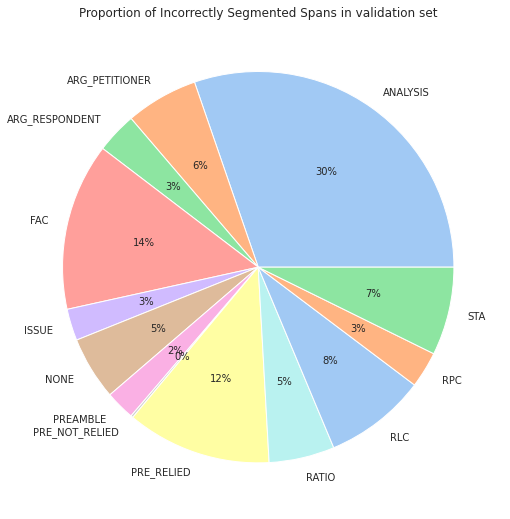

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count)),
               columns =['Labels', 'Illegal_Spans_Count'])

colors = sns.color_palette('pastel')

fig_prop()
plt.pie(data.sort_values('Labels').Illegal_Spans_Count, labels = data.sort_values('Labels').Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of Incorrectly Segmented Spans in validation set')
plt.show()

In [ ]:
#Paheli

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_bert

/content/drive/My Drive/Legal DS/Paheli_bert


In [ ]:
f = open('train_paheli_to_ekstep.json')
train_data = json.load(f)
f.close()

f = open('dev_paheli_to_ekstep.json')
dev_data = json.load(f)
f.close()

In [ ]:
all_train_labels = []
for example in range(len(train_data)):
  sentences = train_data[example]['annotations'][0]['result']
  for sentence in sentences:
    all_train_labels.append(sentence['value']['labels'][0])

train_dict = Counter(all_train_labels)

train_df = pd.DataFrame.from_dict(train_dict, orient='index', columns = ['Count']).rename_axis('Labels').reset_index()

In [ ]:
train_df_test = train_df.sort_values('Labels')


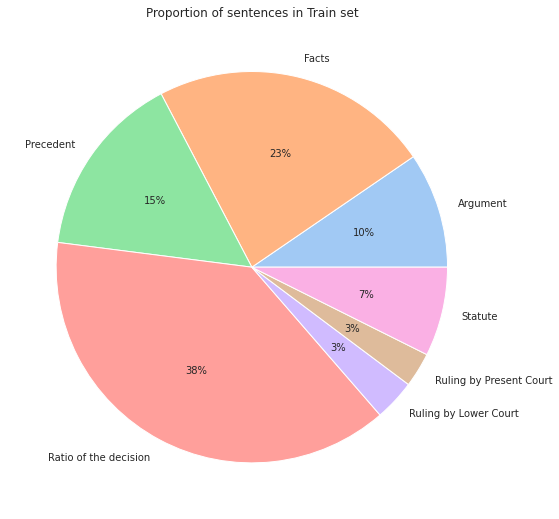

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(train_df_test.Count, labels = train_df_test.Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of sentences in Train set')
plt.show()

In [ ]:
all_dev_labels = []
for example in range(len(dev_data)):
  sentences = dev_data[example]['annotations'][0]['result']
  for sentence in sentences:
    all_dev_labels.append(sentence['value']['labels'][0])

dev_dict = Counter(all_dev_labels)

dev_df = pd.DataFrame.from_dict(dev_dict, orient='index', columns = ['Count']).rename_axis('Labels').reset_index()

In [ ]:
dev_df_test = dev_df.sort_values('Labels')

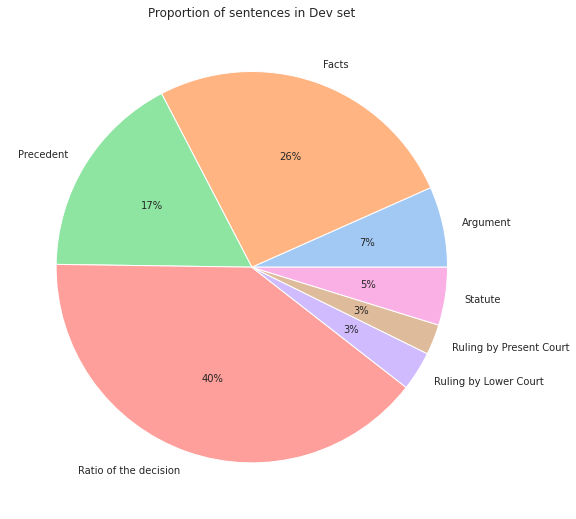

In [ ]:
colors = sns.color_palette('pastel')

fig_prop()
plt.pie(dev_df_test.Count, labels = dev_df_test.Labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of sentences in Dev set')
plt.show()

In [ ]:
####SP2

In [ ]:
correct_spans = [(0, 19, 'Facts'), (121, 130, 'Ratio of the decision'), (666, 669, 'Argument'), (694, 701, 'Ratio of the decision'), (730, 731, 'Precedent'), (1130, 1131, 'Ratio of the decision'), (1132, 1154, 'Precedent'), (1289, 1296, 'Precedent'), (1297, 1326, 'Ratio of the decision'), (1327, 1338, 'Precedent'), (1419, 1422, 'Ratio of the decision'), (1453, 1460, 'Argument'), (1638, 1641, 'Ratio of the decision'), (1642, 1646, 'Ruling by Present Court'), (1816, 1820, 'Ruling by Present Court')]

In [ ]:
# labels = ['MASK', "NONE", "Facts", "Argument", "Ratio of the decision", "Statute", "Precedent", "Ruling by Present Court", "Ruling by Lower Court"]
labels = ["Facts", "Argument", "Ratio of the decision", "Statute", "Precedent", "Ruling by Present Court", "Ruling by Lower Court"]

In [ ]:
per_label_f1= [0.8705882352941177, 0.6622516556291392, 0.8843036109064113, 0.7434944237918215, 0.849740932642487, 0.836734693877551, 0.5599999999999999]

In [ ]:
labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

labels_count

[1, 2, 6, 0, 4, 2, 0]

In [ ]:
data = pd.DataFrame(list(zip(labels, labels_count, per_label_f1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

In [ ]:
data_first = data.sort_values('Labels')

In [ ]:
###SP 10

In [ ]:
correct_spans = [(197, 198, 'Ratio of the decision'), (535, 536, 'Ruling by Present Court'), (751, 751, 'Ratio of the decision'), (992, 993, 'Ruling by Present Court')]

labels = ["Facts", "Argument", "Ratio of the decision", "Statute", "Precedent", "Ruling by Present Court", "Ruling by Lower Court"]

per_label_F1 = [0.6471663619744058, 0.0, 0.5944319036869826, 0.0, 0.037037037037037035, 0.09170305676855894, 0.0]


labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

data_second = data.sort_values('Labels')

In [ ]:
joined = pd.concat([data_first, data_second])

In [ ]:
models = []
for i in range(len(joined)):
  if(i < 7):
    models.append("Best Span Model")
  else:
    models.append("Span len 10 Model")

In [ ]:
joined['Models'] = models

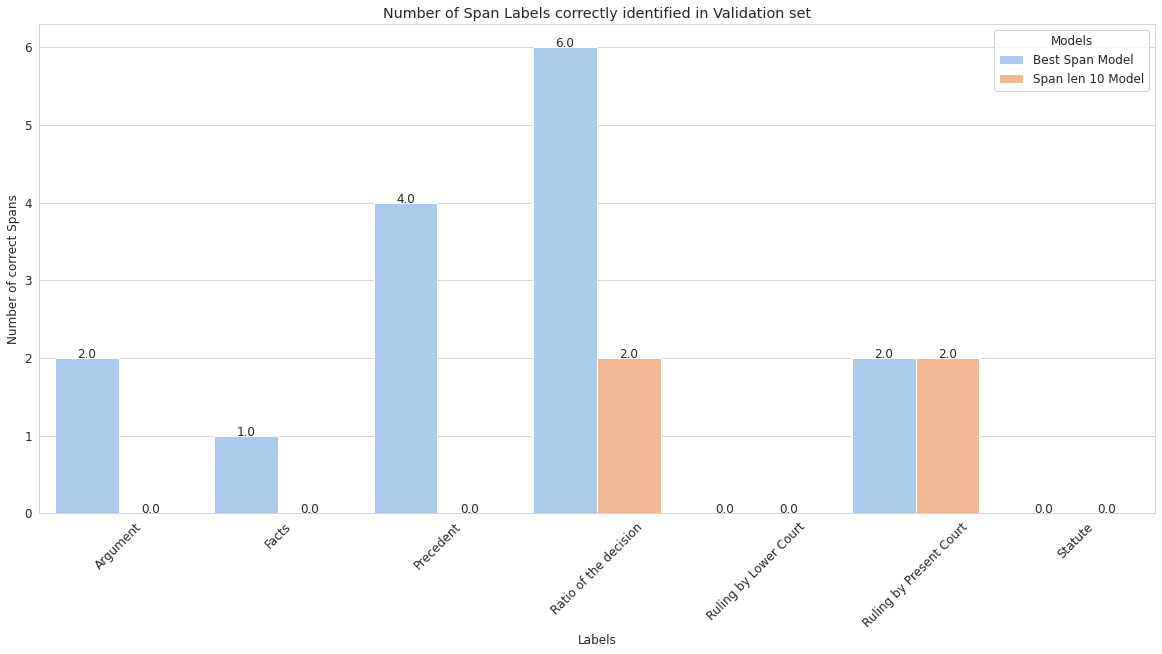

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = joined, palette = 'pastel', hue = "Models")

# total = float(sum(labels_count))
for p in ax.patches:
    # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(y, (x, y),ha='center')

plt.xticks(rotation=45)
# plt.legend(title='Team', fontsize='10', title_fontsize='14')
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Number of Span Labels correctly identified in Validation set')
plt.show()

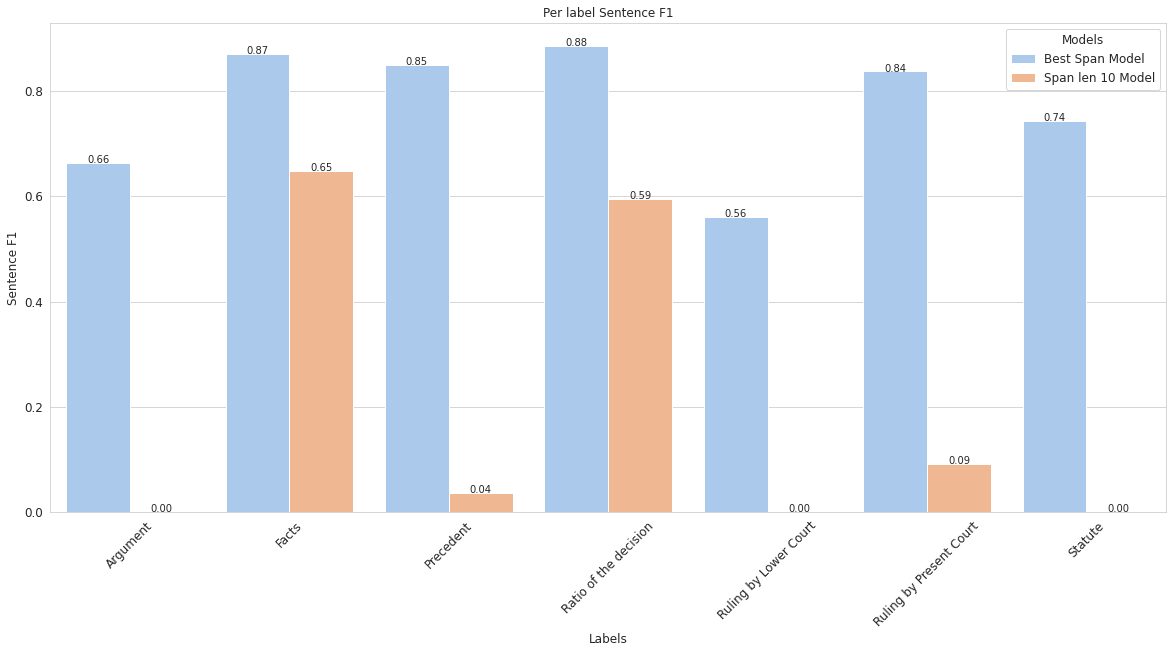

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Sentence_F1", data = joined, hue = "Models" , palette = 'pastel')
matplotlib.rcParams.update({'font.size': 10})

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1')
plt.show()

In [ ]:
####BASELINE

In [ ]:
correct_spans = [[(0, 4, 3), (93, 93, 5), (94, 97, 7), (230, 235, 7), (247, 248, 8)], [(170, 173, 8)], [(169, 173, 8)], [(28, 29, 4), (59, 67, 7), (68, 69, 5)], [], [], [(0, 4, 5), (13, 14, 9), (15, 15, 3)], [(106, 113, 4)], [(31, 32, 5), (33, 38, 3), (127, 134, 5)], []]

In [ ]:
tag2idx = {"<pad>": 0, "<start>": 1, "<end>": 2, "Facts": 3, "Argument": 4, "Ratio of the decision": 5, "Statute": 6, "Precedent": 7, "Ruling by Present Court": 8, "Ruling by Lower Court": 9}

In [ ]:
idx2tag = {v: k for k, v in tag2idx.items()}

In [ ]:
new_correct_spans = []
for doc in correct_spans:
  for item in doc:
    label = idx2tag[item[2]]
    new_correct_spans.append((item[0], item[1], label))

In [ ]:
correct_spans = new_correct_spans

labels = ["Facts", "Argument", "Ratio of the decision", "Statute", "Precedent", "Ruling by Present Court", "Ruling by Lower Court"]

per_label_F1 = [0.889, 0.690, 0.914, 0.746, 0.897, 0.831, 0.611]


labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

data_third = data.sort_values('Labels')

In [ ]:
joined = pd.concat([joined, data_third])

In [ ]:
models = []
for i in range(len(joined)):
  if(i < 7):
    models.append("Best Span Model")
  elif(i < 14):
    models.append("Span len 10 Model")
  else:
    models.append("Non-Span Baseline")

In [ ]:
joined['Models'] = models
joined

,Labels,Correct_Spans_Count,Sentence_F1,Models
1,Argument,2,0.662252,Best Span Model
0,Facts,1,0.870588,Best Span Model
4,Precedent,4,0.849741,Best Span Model
2,Ratio of the decision,6,0.884304,Best Span Model
6,Ruling by Lower Court,0,0.560000,Best Span Model
5,Ruling by Present Court,2,0.836735,Best Span Model
3,Statute,0,0.743494,Best Span Model
1,Argument,0,0.000000,Span len 10 Model
0,Facts,0,0.647166,Span len 10 Model
4,Precedent,0,0.037037,Span len 10 Model


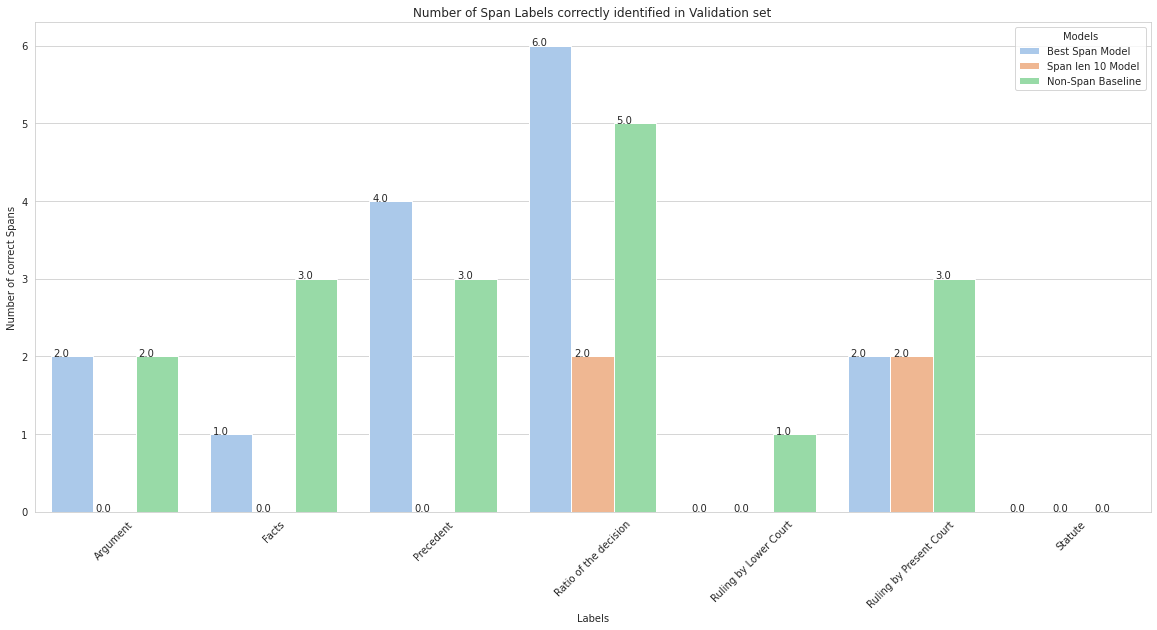

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = joined, palette = 'pastel', hue = "Models")

# total = float(sum(labels_count))
for p in ax.patches:
    # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(y, (x, y),ha='center')

plt.xticks(rotation=45)
# plt.legend(title='Team', fontsize='10', title_fontsize='14')
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Number of Span Labels correctly identified in Validation set')
plt.show()

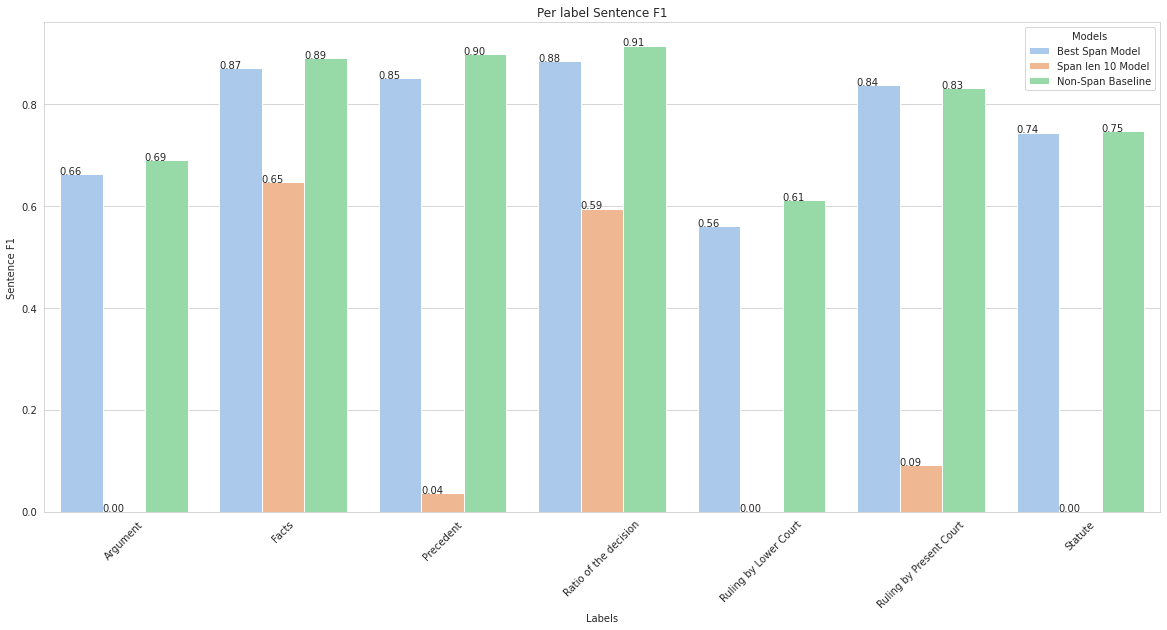

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Sentence_F1", data = joined, hue = "Models" , palette = 'pastel')
matplotlib.rcParams.update({'font.size': 10})

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1')
plt.show()

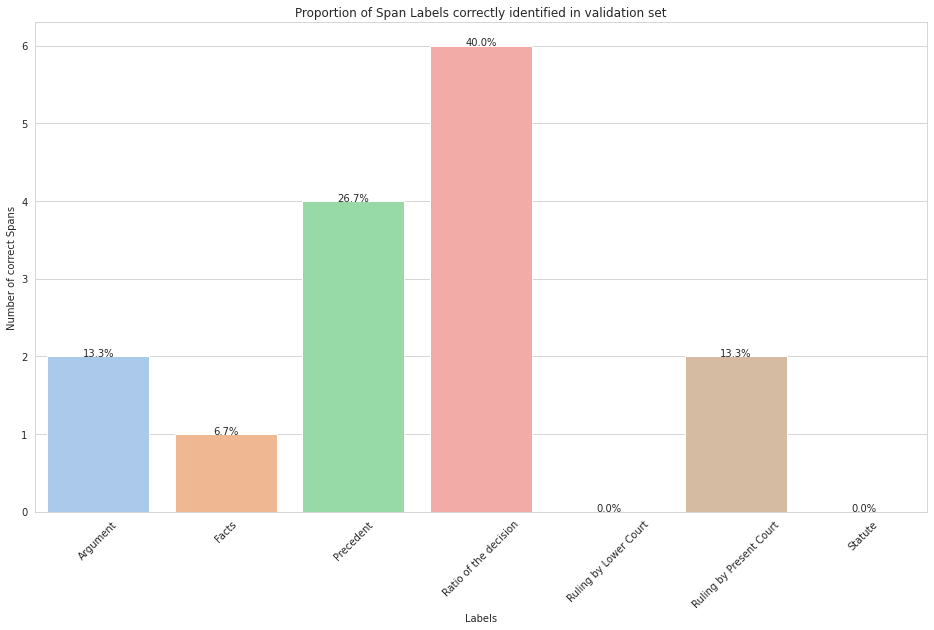

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(labels_count))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Proportion of Span Labels correctly identified in validation set')
plt.show()

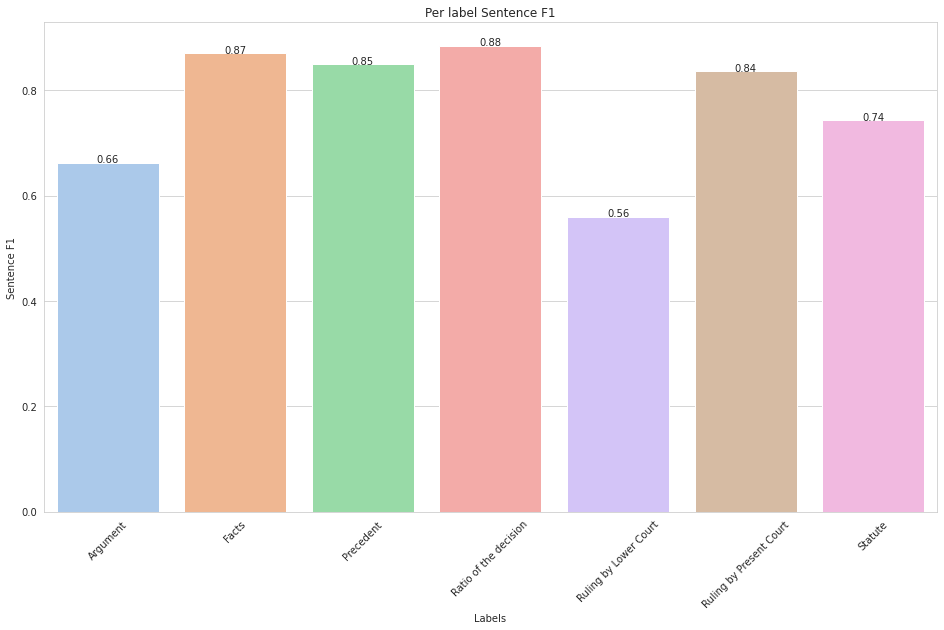

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Sentence_F1", data = data, order = data.sort_values('Labels').Labels, palette = 'pastel')

total = float(sum(per_label_f1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1')
plt.show()

In [ ]:
%cd /content/drive/My\ Drive/Legal\ DS/Paheli_new_corpus/semantic-segmentation/Corpus/

/content/drive/My Drive/Legal DS/Paheli_new_corpus/semantic-segmentation/Corpus


In [ ]:
f = open('dev.json')
train_corpus = json.load(f)

In [ ]:
test_corpus = train_corpus[0:6]

In [ ]:
def create_doc (id, sentence, label, path):
  document = []
  labelled_sent = sentence + "\t" + label + "\n"
  document.append(labelled_sent)
  if(os.path.exists(f"{path}/{id}.txt")):
    f = open(f"{path}/{id}.txt", "a")
    for sent in document:
      f.write(sent)
    f.close()
  else:
    f = open(f"{path}/{id}.txt", "w")
    for sent in document:
      f.write(sent)
    f.close()

In [ ]:
def create_category (id, category, path):
  if(os.path.exists(f"{path}/{category}.txt")):
    f = open(f"{path}/{category}.txt", "a")
    f.write(f"{id} ")
    f.close()
  else:
    f = open(f"{path}/{category}.txt", "w")
    f.write(f"{id} ")
    f.close()

In [ ]:
corpus_path = 'dev_data'
cat_path = 'dev_categories'
emb_path  = 'dev_pretrained_embeddings_cleaned'

In [ ]:
#Create dataset in Paheli format for DEV
for i in range(len(train_corpus)):  
  id = train_corpus[i]['id']
  category = train_corpus[i]['meta']['group']
  sentences = train_corpus[i]['annotations'][0]['result']
  #create_category(id, category, cat_path)

  for j in range(len(sentences)):
    sentence = train_corpus[i]['annotations'][0]['result'][j]['value']['text']
    sentence_cleaned = sentence.replace("\n", "")
    label = train_corpus[i]['annotations'][0]['result'][j]['value']['labels'][0]
    create_doc(id, sentence_cleaned, label, corpus_path)

In [ ]:
for i in range(len(test_corpus)):
  print(test_corpus[i]['id'])

In [ ]:
with open('test_ekstep.json', 'w') as jsonfile:
   json.dump(test_corpus, jsonfile)

In [ ]:
test_corpus[0]

{'id': 4180,
 'annotations': [{'result': [{'id': 'd4814190a8ab41e98029ce8aded54acc',
     'value': {'start': 0,
      'end': 95,
      'text': 'PETITIONER:\nTHE COMMISSIONER OF INCOME-TAXNEW DELHI\n\nVs.\n\nRESPONDENT:\nM/s. CHUNI LAL MOONGA RAM',
      'labels': ['PREAMBLE']}},
    {'id': 'e0a4453c970d4a94b73abe14ff770b1e',
     'value': {'start': 95,
      'end': 143,
      'text': '\n\nDATE OF JUDGMENT:\n05/05/1961\n\nBENCH:\nDAS, S.K.',
      'labels': ['PREAMBLE']}},
    {'id': '84f1a099b0174eb8867cad153a006887',
     'value': {'start': 143,
      'end': 581,
      'text': '\nBENCH:\nDAS, S.K.\nHIDAYATULLAH, M.\nSHAH, J.C.\n\nCITATION:            1962 SCR (2) 823\n 1962 AIR 1272\n\nACT:\nExcess Profits Tax-Income-Assesseecarrying on business in\ntaxable territory-Losses incurred in transactionsin non-\ntaxable territory-If allowable in computing income-Excess\nProfits Tax Act, 1940 (15 of 1940), s. 5.\n\nHEADNOTE:\nDuring the assessment year 1946-47, the assessee was\ncarrying on 

In [ ]:
all_sents = []
all_labels = []
for example in range(len(test_corpus)):
  sentences = test_corpus[example]['annotations'][0]['result']
  for sentence in sentences:
    all_labels.append(sentence['value']['labels'][0])
    all_sents.append(sentence['value']['text'])


In [ ]:
len(all_labels)

582

In [ ]:
correct_spans = [(11, 17, 'NONE'), (50, 50, 'FAC'), (96, 98, 'PREAMBLE'), (99, 99, 'NONE'), (120, 120, 'NONE'), (156, 156, 'PRE_RELIED'), (163, 163, 'PRE_RELIED'), (167, 167, 'PRE_RELIED'), (168, 181, 'ANALYSIS'), (214, 214, 'NONE'), (233, 234, 'NONE'), (275, 275, 'FAC'), (276, 276, 'ISSUE'), (310, 310, 'STA'), (314, 317, 'ANALYSIS'), (348, 348, 'PRE_RELIED'), (385, 404, 'PREAMBLE'), (405, 409, 'NONE'), (420, 421, 'RLC'), (422, 422, 'FAC'), (423, 427, 'ANALYSIS'), (435, 437, 'RPC'), (438, 438, 'NONE'), (439, 467, 'PREAMBLE'), (488, 488, 'NONE'), (489, 493, 'ISSUE'), (494, 494, 'NONE'), (511, 511, 'STA'), (519, 524, 'NONE'), (525, 535, 'PREAMBLE'), (554, 554, 'FAC'), (555, 555, 'ISSUE'), (556, 556, 'NONE'), (581, 581, 'NONE')]

In [ ]:
f = open("test_spans.txt", "w")
for item in correct_spans:
  start = item[0]
  end = item[1] + 1
  label = item[2]
  sents = all_sents[start:end]
  f.write(f"\n\n....{start}, {end}....\n####")
  f.write(label)
  f.write("####\n")
  for sent in sents:
    f.write(sent)
f.close()

In [ ]:
# 4180
# 4078
# 4081
# 4080
# 4196
# 4131

In [ ]:
for i in range(len(test_corpus)):
  print(len(train_corpus[i]['annotations'][0]['result']))

96
139
150
54
86
57


In [ ]:
f = open("pre_relied_4078.txt", "w")
for sent in all_sents[163:182]:
  f.write(sent)

f.close()

In [ ]:
f = open("fac_issue_4196.txt", "w")
for sent in all_sents[485:496]:
  f.write(sent)

f.close()

In [ ]:
##############NEW sp2

In [ ]:
correct_spans = [(0, 9, 'PREAMBLE'), (17, 19, 'FAC'), (32, 32, 'RLC'), (40, 41, 'ISSUE'), (50, 54, 'ARG_RESPONDENT'), (104, 104, 'ANALYSIS'), (108, 109, 'RATIO'), (110, 111, 'RPC'), (112, 112, 'NONE'), (113, 141, 'PREAMBLE'), (162, 162, 'NONE'), (163, 167, 'ISSUE'), (168, 168, 'NONE'), (185, 185, 'STA'), (193, 198, 'NONE'), (199, 219, 'PREAMBLE'), (220, 225, 'NONE'), (230, 230, 'RLC'), (249, 250, 'ANALYSIS'), (251, 251, 'ISSUE'), (276, 280, 'ANALYSIS'), (327, 327, 'RPC'), (328, 328, 'NONE'), (329, 339, 'PREAMBLE'), (358, 358, 'FAC'), (359, 359, 'ISSUE'), (360, 360, 'NONE'), (385, 385, 'NONE'), (386, 389, 'PREAMBLE'), (390, 390, 'NONE'), (436, 436, 'STA'), (455, 459, 'RPC'), (460, 461, 'NONE'), (462, 469, 'PREAMBLE'), (470, 470, 'NONE'), (522, 522, 'RLC'), (523, 524, 'FAC'), (525, 525, 'ANALYSIS'), (665, 668, 'RPC'), (669, 670, 'NONE'), (671, 686, 'PREAMBLE'), (763, 764, 'ANALYSIS'), (780, 781, 'RPC'), (782, 802, 'PREAMBLE'), (850, 858, 'NONE'), (888, 892, 'NONE'), (893, 893, 'FAC'), (897, 897, 'ISSUE'), (898, 898, 'ANALYSIS'), (905, 905, 'ANALYSIS'), (921, 925, 'ANALYSIS'), (926, 926, 'STA'), (927, 933, 'ANALYSIS'), (934, 934, 'ISSUE'), (942, 942, 'PRE_RELIED'), (968, 968, 'RATIO'), (971, 978, 'PREAMBLE'), (979, 991, 'FAC'), (992, 994, 'ISSUE'), (998, 998, 'ARG_RESPONDENT'), (1016, 1019, 'RPC'), (1020, 1024, 'NONE'), (1060, 1060, 'FAC'), (1061, 1062, 'RLC'), (1145, 1145, 'PRE_RELIED'), (1146, 1148, 'ANALYSIS'), (1163, 1163, 'NONE'), (1204, 1204, 'FAC'), (1205, 1205, 'ISSUE'), (1239, 1239, 'STA'), (1243, 1246, 'ANALYSIS'), (1277, 1277, 'PRE_RELIED'), (1314, 1321, 'PREAMBLE'), (1322, 1322, 'NONE'), (1346, 1349, 'ANALYSIS'), (1355, 1355, 'RPC'), (1356, 1356, 'NONE'), (1357, 1376, 'PREAMBLE'), (1377, 1381, 'NONE'), (1392, 1393, 'RLC'), (1394, 1394, 'FAC'), (1395, 1399, 'ANALYSIS'), (1407, 1409, 'RPC'), (1410, 1410, 'NONE'), (1411, 1452, 'PREAMBLE'), (1453, 1477, 'FAC'), (1487, 1487, 'NONE'), (1610, 1621, 'PREAMBLE'), (1625, 1629, 'FAC'), (1630, 1630, 'ISSUE'), (1631, 1644, 'FAC'), (1645, 1671, 'ANALYSIS'), (1672, 1672, 'RATIO'), (1673, 1674, 'RPC'), (1675, 1675, 'NONE'), (1724, 1724, 'ISSUE'), (1789, 1790, 'ARG_RESPONDENT'), (1859, 1859, 'NONE'), (1860, 1861, 'RPC'), (1862, 1874, 'PREAMBLE'), (1884, 1888, 'ISSUE'), (1889, 1899, 'FAC'), (1902, 1906, 'ANALYSIS'), (1907, 1907, 'RATIO'), (1908, 1910, 'RPC'), (1911, 1920, 'NONE'), (1940, 1945, 'FAC'), (1949, 1949, 'ARG_PETITIONER'), (1950, 1950, 'STA'), (1955, 1955, 'ISSUE'), (1956, 1956, 'ANALYSIS'), (1957, 1958, 'STA'), (1959, 1959, 'ANALYSIS'), (1960, 1961, 'STA'), (1966, 1972, 'ANALYSIS'), (1973, 1973, 'PRE_RELIED'), (1974, 1974, 'ANALYSIS'), (1988, 1988, 'NONE'), (2050, 2050, 'NONE'), (2051, 2053, 'PREAMBLE'), (2054, 2054, 'NONE'), (2075, 2075, 'NONE'), (2111, 2111, 'PRE_RELIED'), (2118, 2118, 'PRE_RELIED'), (2122, 2122, 'PRE_RELIED'), (2123, 2136, 'ANALYSIS'), (2169, 2169, 'NONE'), (2188, 2189, 'NONE'), (2190, 2194, 'PREAMBLE'), (2195, 2195, 'NONE'), (2203, 2203, 'PRE_RELIED'), (2213, 2213, 'ISSUE'), (2216, 2219, 'RPC'), (2220, 2220, 'NONE'), (2232, 2238, 'NONE'), (2271, 2271, 'FAC'), (2317, 2319, 'PREAMBLE'), (2320, 2330, 'FAC'), (2352, 2357, 'ANALYSIS'), (2358, 2358, 'RATIO'), (2359, 2359, 'RPC'), (2360, 2362, 'NONE'), (2394, 2395, 'ISSUE'), (2425, 2426, 'NONE'), (2449, 2449, 'RLC'), (2450, 2450, 'FAC'), (2465, 2466, 'PRE_RELIED'), (2477, 2477, 'RATIO'), (2478, 2478, 'RPC'), (2479, 2479, 'NONE'), (2563, 2563, 'NONE'), (2577, 2577, 'NONE'), (2578, 2599, 'PREAMBLE'), (2600, 2604, 'NONE'), (2605, 2605, 'FAC'), (2606, 2606, 'ISSUE'), (2607, 2616, 'FAC'), (2617, 2617, 'ARG_PETITIONER'), (2618, 2622, 'ANALYSIS'), (2623, 2623, 'STA'), (2624, 2624, 'ANALYSIS'), (2638, 2638, 'RPC'), (2639, 2639, 'NONE'), (2640, 2652, 'PREAMBLE'), (2653, 2659, 'NONE'), (2774, 2774, 'RPC'), (2775, 2785, 'PREAMBLE'), (2847, 2871, 'ANALYSIS'), (2872, 2872, 'PRE_RELIED')]

labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

per_label_F1 = [0.9812807881773399, 0.9018567639257294, 0.8356275303643725, 0.7777777777777777, 0.48101265822784817, 0.26666666666666666, 0.8199195171026158, 0.4881889763779527, 0.0, 0.4719101123595506, 0.45555555555555555, 0.8771929824561403, 0.4806201550387597]

data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

In [ ]:
data_first = data.sort_values('Labels')
data_first

,Labels,Correct_Spans_Count,Sentence_F1
6,ANALYSIS,24,0.819920
5,ARG_PETITIONER,2,0.266667
4,ARG_RESPONDENT,3,0.481013
2,FAC,18,0.835628
3,ISSUE,15,0.777778
1,NONE,41,0.901857
0,PREAMBLE,20,0.981281
8,PRE_NOT_RELIED,0,0.000000
7,PRE_RELIED,10,0.488189
12,RATIO,6,0.480620


In [ ]:
####BASELINE

In [ ]:
correct_spans = [(9, 59, 'FAC'), (60, 60, 'RLC'), (61, 62, 'FAC'), (63, 63, 'ANALYSIS'), (203, 206, 'RPC'), (207, 208, 'NONE'), (209, 250, 'PREAMBLE'), (251, 275, 'FAC'), (382, 407, 'NONE'), (408, 448, 'PREAMBLE'), (449, 454, 'NONE'), (455, 455, 'RLC'), (514, 518, 'ANALYSIS'), (523, 523, 'ANALYSIS'), (591, 591, 'NONE'), (592, 593, 'RPC'), (594, 628, 'PREAMBLE'), (629, 633, 'NONE'), (635, 635, 'ISSUE'), (669, 669, 'STA'), (673, 676, 'ANALYSIS'), (804, 804, 'PRE_RELIED'), (805, 810, 'ANALYSIS'), (811, 811, 'PRE_RELIED'), (812, 814, 'ANALYSIS'), (815, 815, 'PRE_RELIED'), (816, 829, 'ANALYSIS'), (879, 880, 'RPC'), (881, 882, 'NONE'), (883, 912, 'PREAMBLE'), (913, 917, 'NONE'), (1007, 1007, 'STA'), (1021, 1021, 'NONE'), (1022, 1034, 'PREAMBLE'), (1035, 1041, 'NONE'), (1154, 1155, 'RATIO'), (1156, 1156, 'RPC'), (1157, 1177, 'PREAMBLE'), (1178, 1183, 'NONE'), (1188, 1188, 'RLC'), (1219, 1220, 'PRE_RELIED'), (1221, 1229, 'ANALYSIS'), (1287, 1296, 'PREAMBLE'), (1327, 1328, 'ISSUE'), (1399, 1399, 'NONE'), (1434, 1434, 'FAC'), (1446, 1446, 'ANALYSIS'), (1447, 1447, 'STA'), (1448, 1449, 'ANALYSIS'), (1467, 1467, 'STA'), (1509, 1509, 'RATIO'), (1512, 1527, 'PREAMBLE'), (1535, 1539, 'RLC'), (1604, 1605, 'ANALYSIS'), (1621, 1622, 'RPC'), (1623, 1633, 'PREAMBLE'), (1695, 1719, 'ANALYSIS'), (1720, 1720, 'PRE_RELIED'), (1780, 1781, 'RLC'), (1782, 1799, 'ANALYSIS'), (1824, 1824, 'NONE'), (1825, 1834, 'PREAMBLE'), (1875, 1875, 'FAC'), (1921, 1949, 'PREAMBLE'), (1970, 1970, 'NONE'), (1971, 1975, 'ISSUE'), (2001, 2006, 'NONE'), (2007, 2027, 'PREAMBLE'), (2039, 2068, 'ANALYSIS'), (2069, 2070, 'RATIO'), (2071, 2074, 'RPC'), (2075, 2083, 'NONE'), (2084, 2087, 'PREAMBLE'), (2088, 2088, 'NONE'), (2153, 2157, 'RPC'), (2158, 2159, 'NONE'), (2195, 2195, 'ANALYSIS'), (2196, 2197, 'STA'), (2198, 2198, 'ANALYSIS'), (2199, 2200, 'STA'), (2212, 2212, 'PRE_RELIED'), (2213, 2213, 'ANALYSIS'), (2214, 2214, 'PRE_RELIED'), (2227, 2227, 'NONE'), (2228, 2239, 'PREAMBLE'), (2248, 2248, 'ISSUE'), (2291, 2292, 'RPC'), (2293, 2293, 'NONE'), (2356, 2357, 'NONE'), (2358, 2372, 'PREAMBLE'), (2419, 2419, 'NONE'), (2447, 2447, 'FAC'), (2448, 2448, 'ISSUE'), (2449, 2458, 'FAC'), (2459, 2459, 'ARG_PETITIONER'), (2460, 2464, 'ANALYSIS'), (2465, 2465, 'STA'), (2466, 2466, 'ANALYSIS'), (2481, 2481, 'NONE'), (2482, 2494, 'PREAMBLE'), (2504, 2508, 'ISSUE'), (2528, 2530, 'RPC'), (2531, 2540, 'NONE'), (2541, 2551, 'PREAMBLE'), (2568, 2569, 'RLC'), (2570, 2570, 'FAC'), (2571, 2571, 'ISSUE'), (2572, 2572, 'NONE'), (2573, 2592, 'ANALYSIS'), (2597, 2597, 'NONE'), (2636, 2640, 'ANALYSIS'), (2646, 2647, 'RATIO'), (2648, 2650, 'RPC'), (2651, 2651, 'NONE'), (2660, 2672, 'FAC'), (2673, 2675, 'ISSUE'), (2697, 2700, 'RPC'), (2701, 2705, 'NONE'), (2758, 2758, 'NONE'), (2762, 2772, 'FAC'), (2773, 2776, 'ISSUE'), (2802, 2804, 'NONE'), (2805, 2812, 'PREAMBLE'), (2813, 2813, 'NONE'), (2846, 2846, 'RPC'), (2847, 2847, 'NONE'), (2853, 2853, 'NONE'), (2874, 2877, 'RPC'), (2878, 2878, 'NONE')]

labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

per_label_F1 = [0.97, 0.82, 0.81, 0.87, 0.42, 0.57, 0.81, 0.68, 0.0, 0.64, 0.58, 0.82, 0.53]


labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

In [ ]:
data_second = data.sort_values('Labels')

In [ ]:
joined = pd.concat([data_first, data_second])

In [ ]:
models = []
for i in range(len(joined)):
  if(i < 13):
    models.append("Best Span Model")
  else:
    models.append("Non-Span Baseline")


In [ ]:
joined['Models'] = models

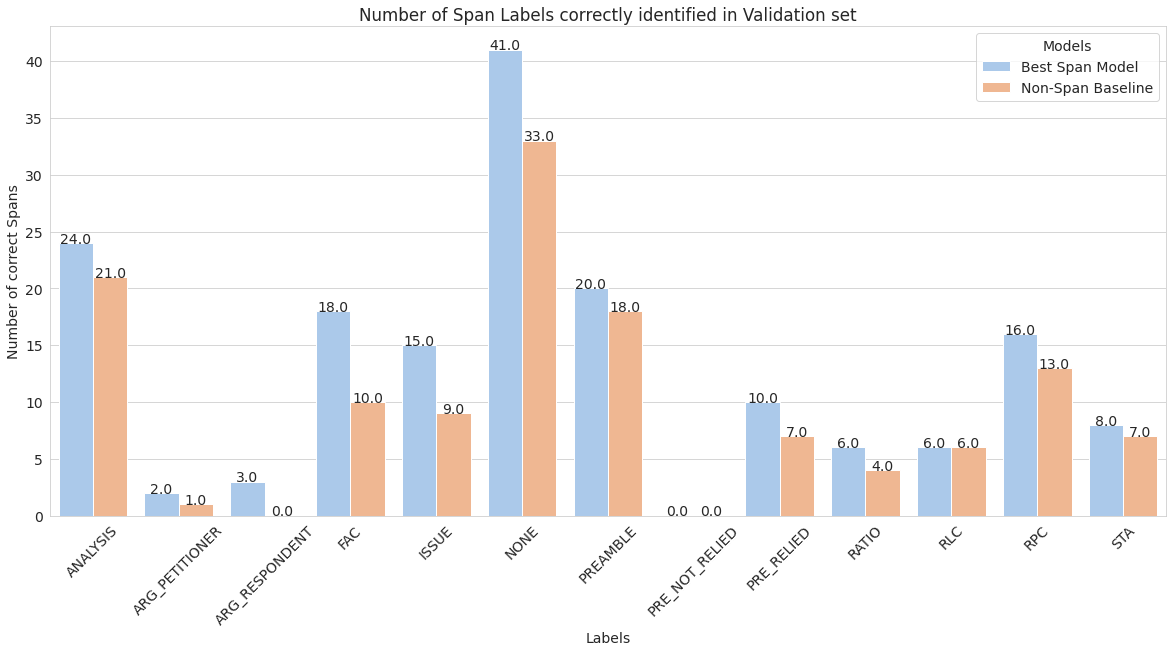

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = joined, palette = 'pastel', hue = "Models")
matplotlib.rcParams.update({'font.size': 14})

# total = float(sum(labels_count))
for p in ax.patches:
    # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(y, (x, y),ha='center')

plt.xticks(rotation=45)
# plt.legend(title='Team', fontsize='10', title_fontsize='14')
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Number of Span Labels correctly identified in Validation set')
plt.show()

In [ ]:
##########SP 10

In [ ]:
correct_spans= [(41, 41, 'ISSUE'), (200, 201, 'ANALYSIS'), (202, 202, 'ISSUE'), (278, 278, 'RPC'), (279, 279, 'NONE'), (280, 282, 'PREAMBLE'), (415, 416, 'RPC'), (417, 418, 'NONE'), (470, 470, 'RPC'), (471, 471, 'NONE'), (483, 489, 'NONE'), (540, 541, 'STA'), (771, 774, 'RPC'), (775, 776, 'NONE'), (818, 823, 'NONE'), (824, 824, 'RLC'), (825, 825, 'ISSUE'), (963, 984, 'PREAMBLE'), (985, 989, 'NONE'), (1024, 1024, 'NONE'), (1102, 1121, 'PREAMBLE'), (1122, 1126, 'NONE'), (1137, 1138, 'RLC'), (1139, 1139, 'FAC'), (1155, 1155, 'NONE'), (1156, 1163, 'PREAMBLE'), (1164, 1176, 'FAC'), (1177, 1179, 'ISSUE'), (1270, 1271, 'RPC'), (1272, 1273, 'NONE'), (1274, 1289, 'PREAMBLE'), (1297, 1301, 'RLC'), (1302, 1331, 'FAC'), (1332, 1360, 'ANALYSIS'), (1383, 1384, 'RPC'), (1446, 1446, 'NONE'), (1559, 1559, 'NONE'), (1560, 1571, 'PREAMBLE'), (1623, 1624, 'RPC'), (1625, 1625, 'NONE'), (1626, 1667, 'PREAMBLE'), (1894, 1898, 'RPC'), (1899, 1900, 'NONE'), (2005, 2034, 'PREAMBLE'), (2035, 2039, 'NONE'), (2141, 2142, 'RPC'), (2143, 2143, 'NONE'), (2144, 2148, 'PREAMBLE'), (2167, 2167, 'ISSUE'), (2174, 2174, 'NONE'), (2175, 2187, 'PREAMBLE'), (2188, 2191, 'NONE'), (2203, 2203, 'ARG_PETITIONER'), (2227, 2227, 'PRE_RELIED'), (2228, 2228, 'ANALYSIS'), (2229, 2229, 'PRE_RELIED'), (2242, 2242, 'NONE'), (2243, 2281, 'PREAMBLE'), (2282, 2285, 'NONE'), (2340, 2340, 'NONE'), (2341, 2369, 'PREAMBLE'), (2466, 2466, 'ANALYSIS'), (2537, 2537, 'RPC'), (2538, 2538, 'NONE'), (2539, 2551, 'PREAMBLE'), (2584, 2584, 'RATIO'), (2598, 2608, 'PREAMBLE'), (2629, 2629, 'NONE'), (2654, 2654, 'NONE'), (2655, 2657, 'PREAMBLE'), (2658, 2668, 'FAC'), (2669, 2672, 'ISSUE'), (2721, 2723, 'RLC'), (2833, 2834, 'RATIO'), (2835, 2835, 'RPC'), (2836, 2843, 'PREAMBLE'), (2878, 2878, 'NONE')]

labels = ['PREAMBLE', 'NONE', 'FAC', 'ISSUE', 'ARG_RESPONDENT', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'PRE_NOT_RELIED', 'STA', 'RLC', 'RPC', 'RATIO']

labels_count = []
for label in labels:
  labels_count.append(0)

for item in correct_spans:
  if(item[2] in labels):
    labels_count[labels.index(item[2])] = labels_count[labels.index(item[2])] + 1

per_label_F1= [0.9476688867745005, 0.6779661016949152, 0.8020477815699659, 0.546875, 0.0, 0.04494382022471909, 0.7371456030754445, 0.1891891891891892, 0.0, 0.45070422535211263, 0.1954887218045113, 0.6454545454545455, 0.45614035087719296]

data = pd.DataFrame(list(zip(labels, labels_count, per_label_F1)),
               columns =['Labels', 'Correct_Spans_Count', 'Sentence_F1'])

data_third = data.sort_values('Labels')

joined = pd.concat([joined, data_third])

In [ ]:
models = []
for i in range(len(joined)):
  if(i < 13):
    models.append("Best Span Model")
  elif(i < 26):
    models.append("Non-Span Baseline")
  else:
    models.append("Span len 10 model")

In [ ]:
joined['Models'] = models

In [ ]:
joined_test = joined[joined.Models != "Non-Span Baseline"]

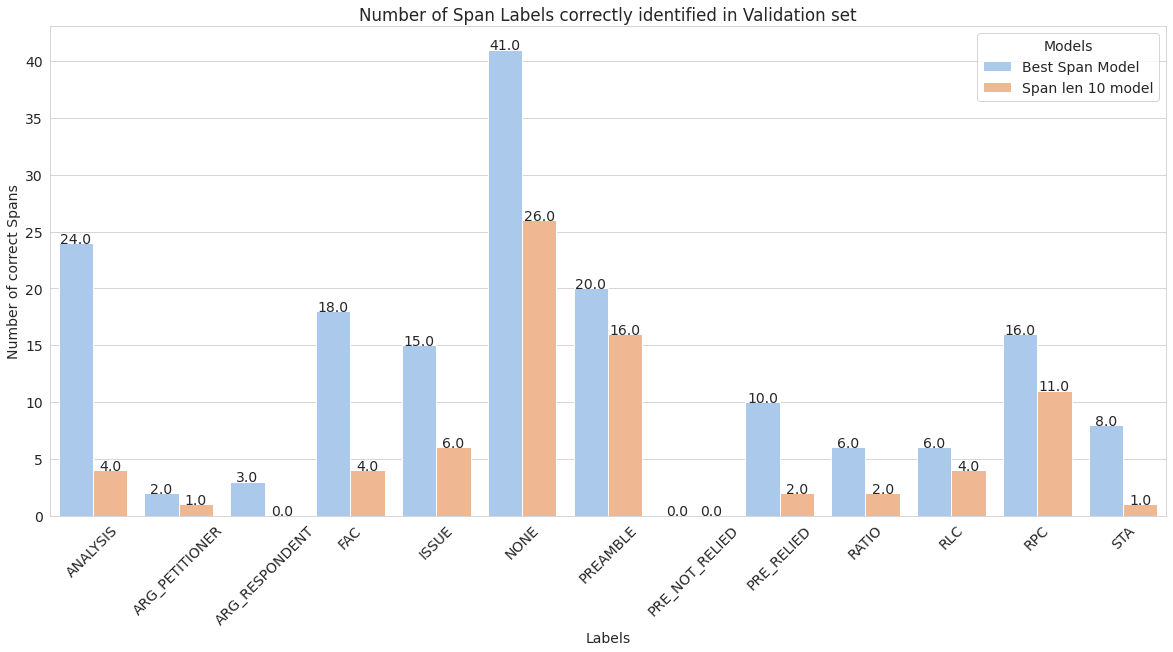

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Correct_Spans_Count", data = joined_test, palette = 'pastel', hue = "Models")

# total = float(sum(labels_count))
for p in ax.patches:
    # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.2
    y = p.get_height()
    ax.annotate(y, (x, y),ha='center')

plt.xticks(rotation=45)
# plt.legend(title='Team', fontsize='10', title_fontsize='14')
plt.xlabel('Labels')
plt.ylabel('Number of correct Spans')
plt.title('Number of Span Labels correctly identified in Validation set')
plt.show()

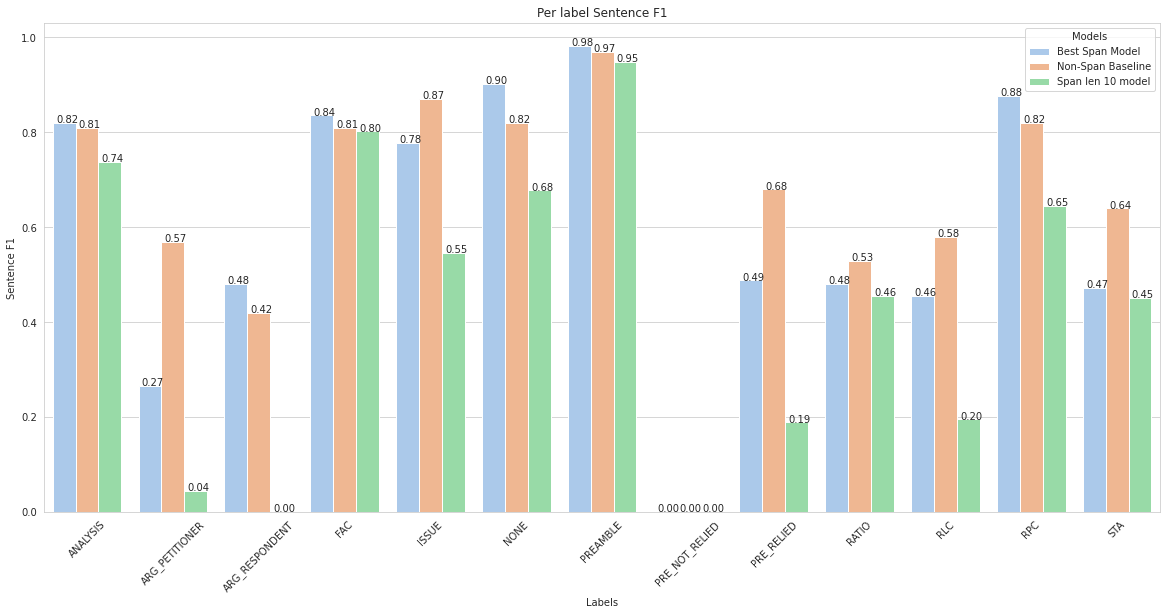

In [ ]:
fig_prop()
ax = sns.barplot(x = "Labels", y = "Sentence_F1", data = joined, hue = "Models" , palette = 'pastel')
#matplotlib.rcParams.update({'font.size': 10})

total = float(sum(per_label_F1))
for p in ax.patches:
    percentage = '{:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.xticks(rotation=45)
plt.xlabel('Labels')
plt.ylabel('Sentence F1')
plt.title('Per label Sentence F1')
plt.show()